## <center> CHE1450 - Assignment #1 </center>
### <center> Anaerobic Bioprocesses: Lactic Acid Fermentation </center>
### <center> Abhishek Patel </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import odeint

sns.set_theme(context='notebook', style='darkgrid', palette='brg', font='sans-serif', font_scale=1, color_codes=True)

1. Lactic acid bacteria (LAB) such as different species of ***Lactobacillus*** and ***Streptococcus*** can produce lactate as the major end product of the anaerobic fermentation of carbohydrates at high yields and productivities. During lactic acid fermentation, glucose is metabolized via glycolysis to pyruvate, which is then convert to lactate. Lactate can be produced as the sole fermentation end product (termed homolactic fermentation) or as a major end product together with CO2 ethanol and/or acetate (termed heterolactic fermentation) as shown below:

**<center>glucose + 2 ADP + 2 Pi → 2 lactate + 2 ATP</center>**
**<center>(homolactic fermentation)</center>**


**<center>glucose + ADP + Pi → lactate + ethanol + CO2 + ATP</center>**
**<center>(heterolactic fermentation)</center>**


**<center>2 glucose + 5 ADP + 5 Pi → 3 acetate + 2 lactate + 5 ATP</center>**
**<center>(heterolactic fermentation – ***“Bifidobacterium shunt”***)</center>**

    a) What is fermentation and how does it differ from respiration? Provide an explanation using the lactic acid fermentation pathway as an example. Is it possible to get sole acetate and CO2 production from glucose via fermentation? Explain.

**`Fermentation is an anaerobic (non-oxygen-requiring) pathway for breaking down glucose. It begins with the process of glycolysis to produce pyruvic acid and 2 net ATP. Enzymes then carry out chemical reactions to convert pyruvic acid into various fermentation end products. In contrast, respiration is a process that produces energy by breaking down carbon compounds, and it occurs in the presence of oxygen. Respiration, like burning, results in the complete oxidation of glucose into CO2 and water, releasing more energy from glucose than fermentation.`**

**`Using the lactic acid fermentation pathway as an example, one glucose molecule is converted to two pyruvate molecules during glycolysis. In homolactic fermentation, pyruvate is directly converted to lactate, regenerating NAD+ from NADH. In heterolactic fermentation, glucose is converted to lactate, ethanol, and CO2, or to acetate, lactate, and CO2 in the "Bifidobacterium shunt".`**

**`As for the production of sole acetate and CO2 from glucose via fermentation, it is not typically observed. Acetate can be produced as a result of overflow metabolism in certain conditions, but it is usually accompanied by other products. However, metabolic engineering strategies have been applied to modulate acetate formation.`**

    b) Which lactic acid fermentation pathway is most energetically favourable? Support your answer with calculations and ignore ADP, Pi, and ATP.

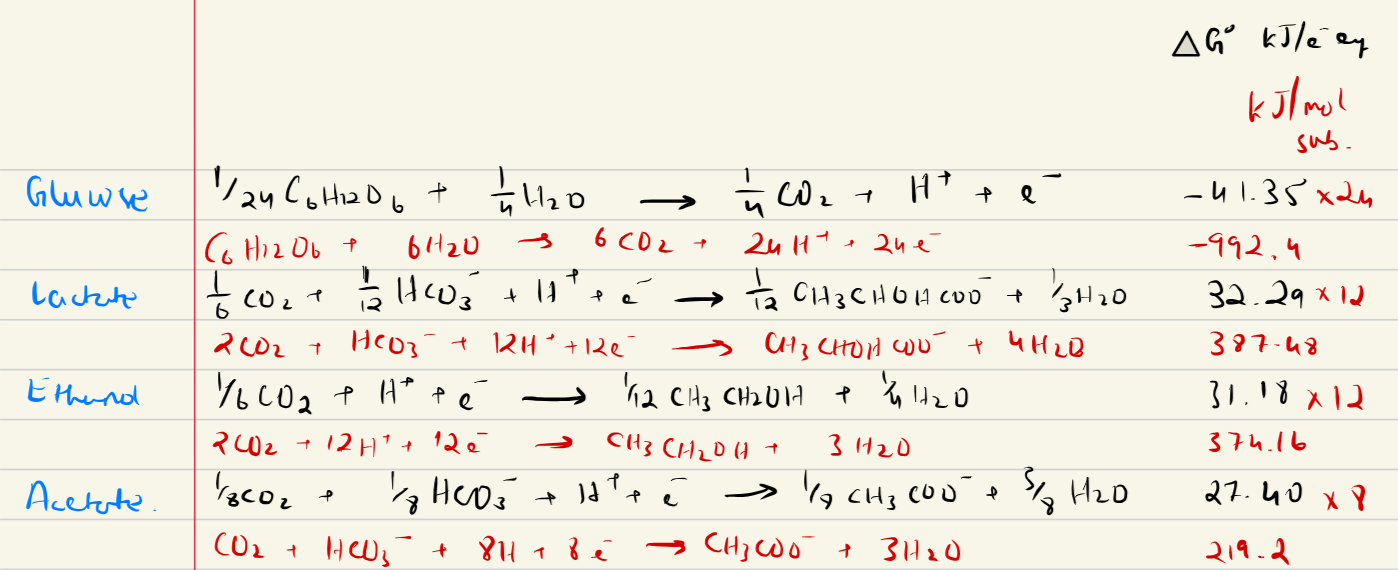

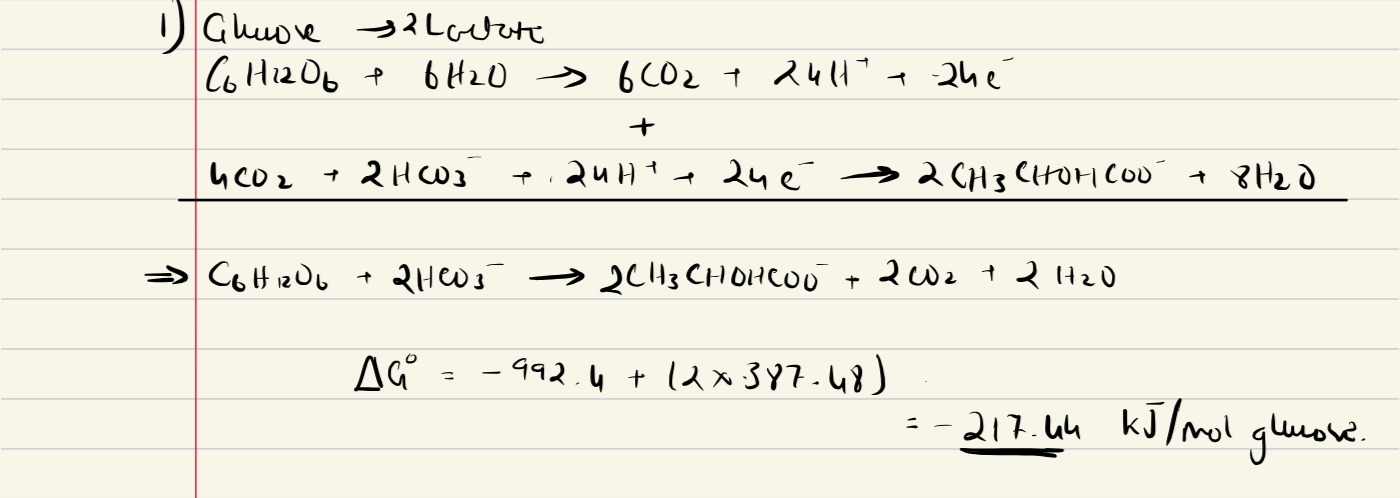

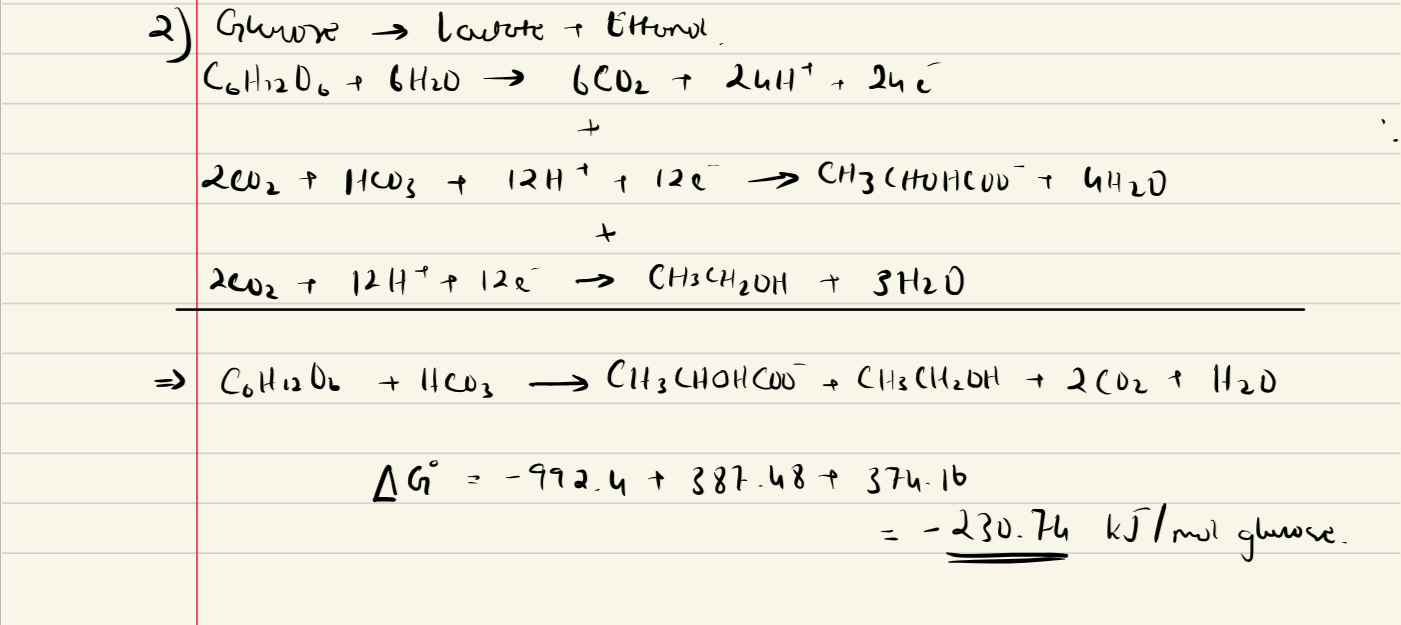

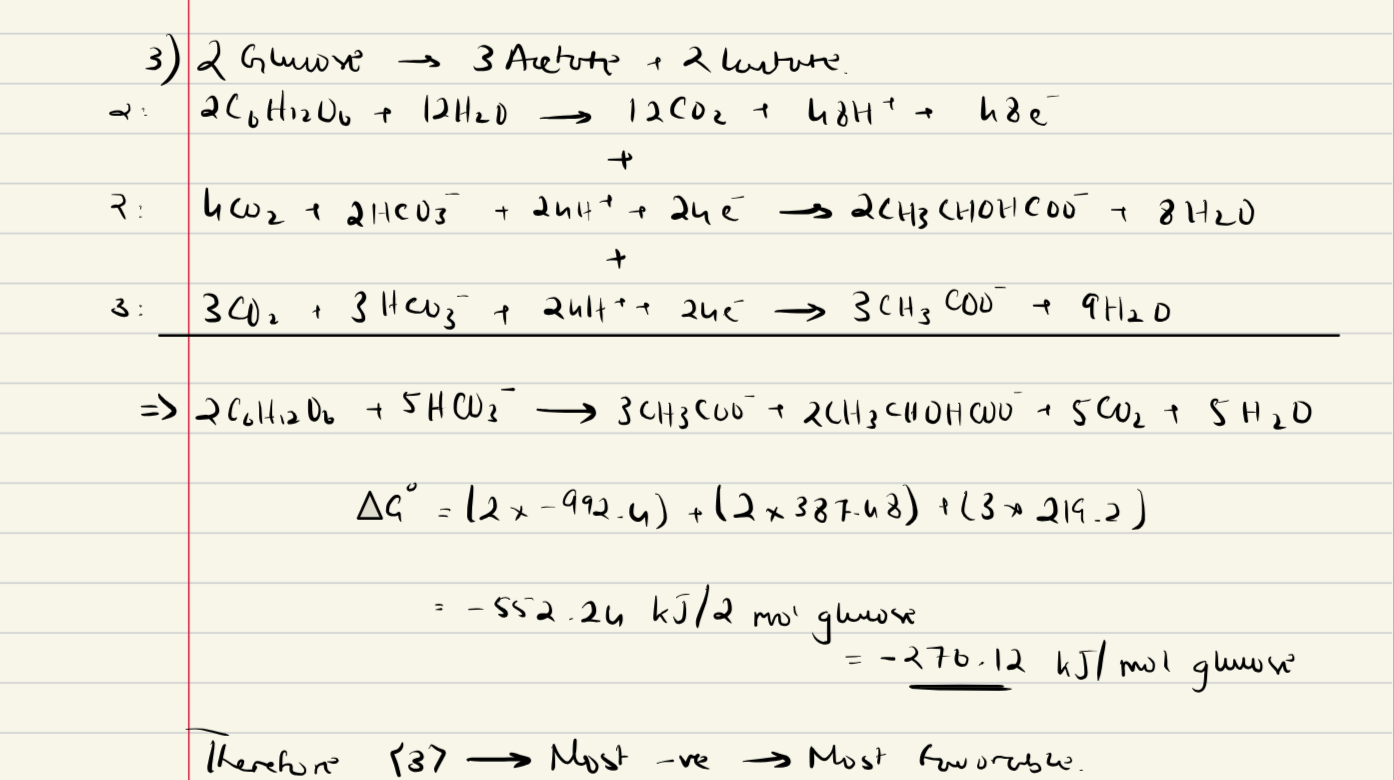

    c) What are the cell and lactate yield values for homolactic acid fermentation. Do these values represent actual yields? Explain.

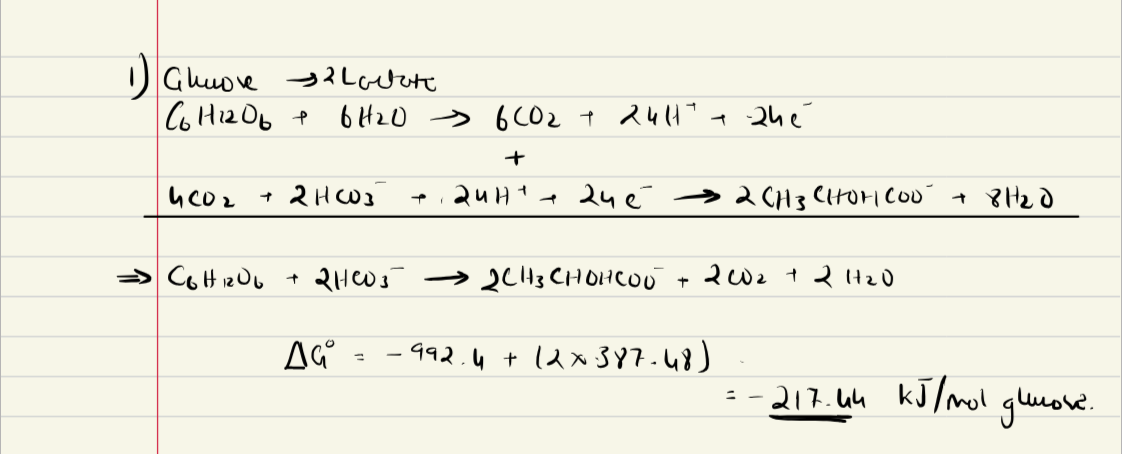

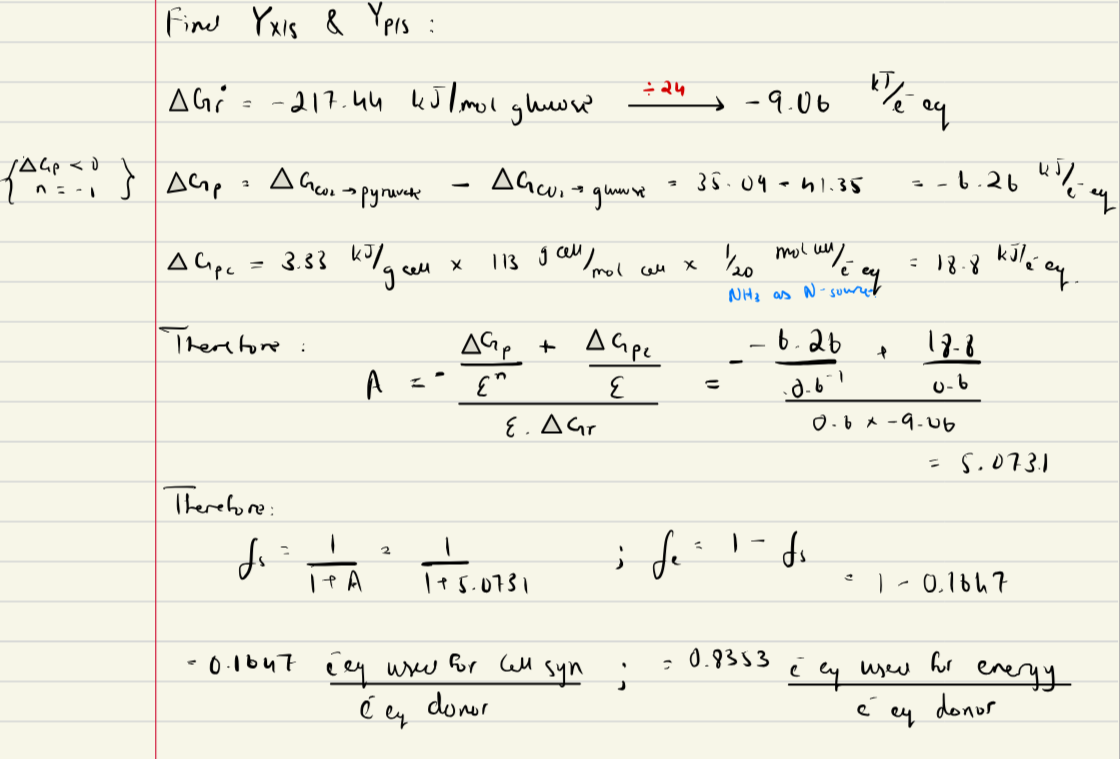

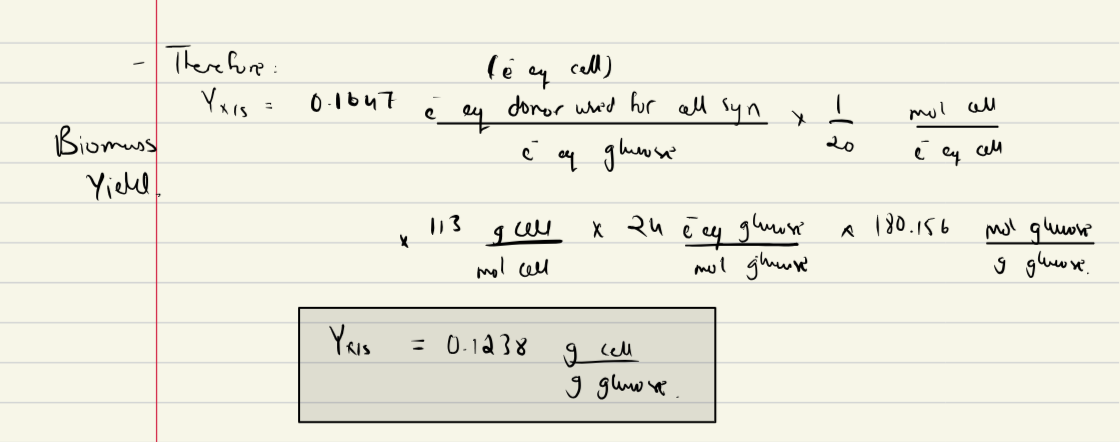

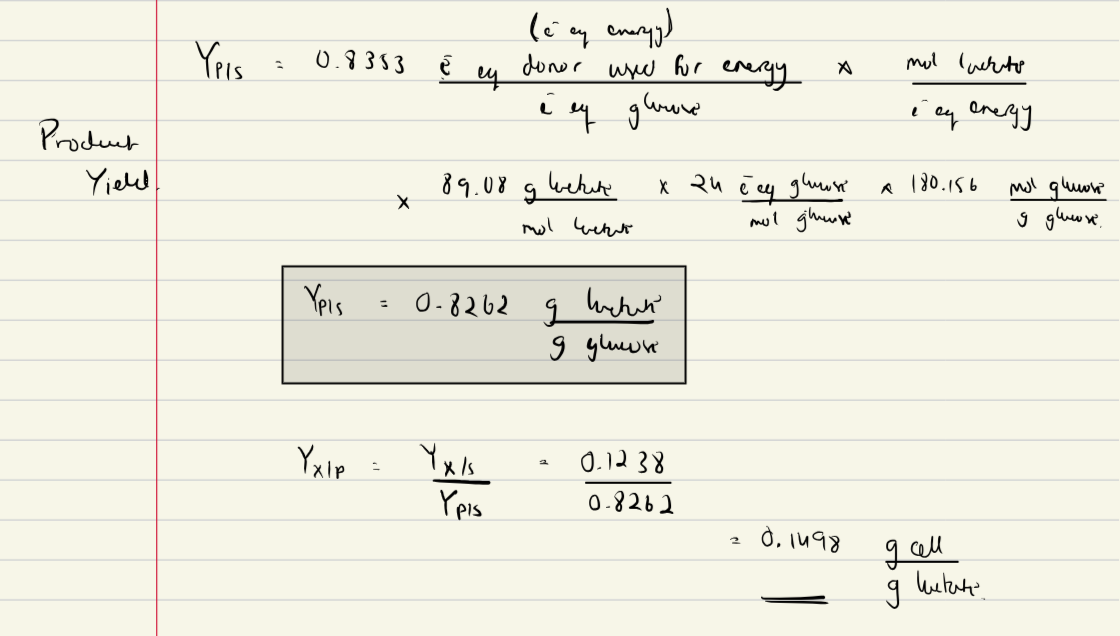

    d) Which fermentation pathway would be best to use in an industrial process? Explain and briefly discuss trade-offs with the other pathways.

**`The best fermentation pathway to use in an industrial process depends on the desired end product and the specific conditions of the process. For instance, if the goal is to produce lactate, the homolactic fermentation pathway would be ideal. This pathway is efficient and produces lactate as the sole end product. However, if the goal is to produce a mixture of products, such as lactate, ethanol, and CO2, the heterolactic fermentation pathway would be more suitable.`**

**`Trade-offs between the pathways include the types and quantities of end products, the efficiency of the process, and the specific requirements of the industrial process. For example, while homolactic fermentation is efficient and produces a single end product, it may not be suitable for processes that require a mixture of end products. On the other hand, heterolactic fermentation can produce a variety of end products, but it may be less efficient and require more complex process control.`**

2. The biotech company Jungbunzlauer is looking to build a new lactic acid production plant in Port Colborne, Ontario (see associated new article) and you were awarded the contract to design the bioprocessing facilities. The bioprocess will use a Lactobacillus delbrueckii strain to convert corn-based glucose derived from an onsite corn wet milling plant into lactate, with fermentation conditions of T = 45°C and pH = 6. 

**(batch bioreactor)** Jungbunzlauer would like to repurpose their existing large production fermentors (500 $m^{3}$ working volume) onsite for the lactic acid fermentation and are considering a batch process.

**Given and Calculated:**

| Variable | Value |
|:---:|:---:|
| Working Volume ($V$) | 500 $m^{3}$ |
| Temperature ($T$) | 45$°C$ |
| $pH$ | 6 |
| Initial Biomass Concentration ($X_{0}$) | 220 $mg/L$ |
| Initial Substrate (Glucose) Concentration ($S_{0}$) | 200 $g/L$ |
| Half Saturation Coefficient ($K_{s}$) | 200 $mg/L$ |
| Lag Time ($t_{lag}$) | 2 $hours$ |
| Harvesting Time ($t_{harvesting}$) | 5 $hours$ |
| $A$ | 5.0731 |
| $f_{s}$ | 0.1647 $e^{-}$ eq donor used for cell synthesis / $e^{-}$ eq donor |
| $f_{e}$ | 0.8353 $e^{-}$ eq donor used for energy / $e^{-}$ eq donor |
| Biomass Yield ($Y_{X/S}$) | 0.1238 $g$ $cell$ $/$ $g$ $glucose$ |
| Product Yield ($Y_{P/S}$) | 0.8262 $g$ $lactate$ $/$ $g$ $glucose$ |
| Product Productivity ($Y_{X/P}$) | 0.1498 $g$ $cell$ $/$ $g$ $lactate$ |
| $C$ | 5.65 (113/20) $g$ $cell$ / $e^{-}$ $eq$ $cells$ |
| $d$ | 1 : fraction of $e^{-}$ from substrate actually transferred for energy |
| $Y_{m}$ | 1.1137 $g$ cell / $e^{-}$ eq substrate used for energy |
| Max Growth Rate($ \widehat{\mu} $) | 0.3591 / day |
| Decay Coefficient ($K_{d}$) | 0.02155 / day |

Calculating from the values in the table above:

<center>
$ 
\widehat{\mu} = Y_{m} \times \widehat{q_{e}} 
$
</center>

where: 

<center>
$ 
Y_{m} = \frac{C}{d.A} = \frac{\frac{113}{20}}{1 \times 5.0731}
$ 
</center>

and:

<center>
$ 
\widehat{q_{e}} = n\left ( \frac{A}{A+1} \right ) \widehat{q} \approx 2 
$
</center>



In [2]:
# Constants
T = 45 # oC
pH = 6

X_0 = 0.220 # g/L L. delbrueckii Concentration
S_0 = 200 # g/L Glucose Concentration
P_0 = 0 # g/L Product Concentration
V_0 = 0.1 * 500
V_max = 500

t_l = 2 + 5 # Lag time + Harvesting Time # hr

A = 5.0731 # 𝑒− eq donor used for cell synthesis / 𝑒− eq donor
C = 113/20 # g cell / e- eq cells
d = 1 # fraction of e- from substrate actually transferred for energy
qe = 2
f_s = 0.1647 # 𝑒− eq donor used for cell synthesis /  𝑒- eq donor
f_e = 0.8353 # 𝑒− eq donor used for energy /  𝑒− eq donor

Y_X_S = 0.1238 # g cell / g glucose
Y_P_S = 0.8262 # g lactate / g glucose
Y_P_X = Y_P_S / Y_X_S # g lactate / g cell
Ym = C / (d * A) # g cell / e- eq substrate used for energy
X_m = Y_X_S * S_0 # g/L

mu_hat = (Ym * qe * 1.07 ** 20) / 24 # / hour

K_d = 0.06 * mu_hat # / hour
K_S = 0.200 # g/L
K_I = 325 # g/L
K_P = 9.5 # g/L

print('𝑌𝑚 =', Ym)
print('𝜇ˆ = ', mu_hat)
print('Kd = ', K_d)

𝑌𝑚 = 1.1137174508683054
𝜇ˆ =  0.3591445929354001
Kd =  0.021548675576124002


a) Plot the concentration of lactate, glucose, and biomass as a function of time, if the initial seed concentration of ***L. delbrueckii*** is 220 mg/L, the initial glucose conc is 200 g/L, and $K_{s}$ is 200 mg/L. Assuming a lag time of 2 hours and time of 5 hours for harvesting (collection of cells and media) and reactor preparation (cleaning, sterilization, filling), what would be a reasonable total time for a complete batch cycle?

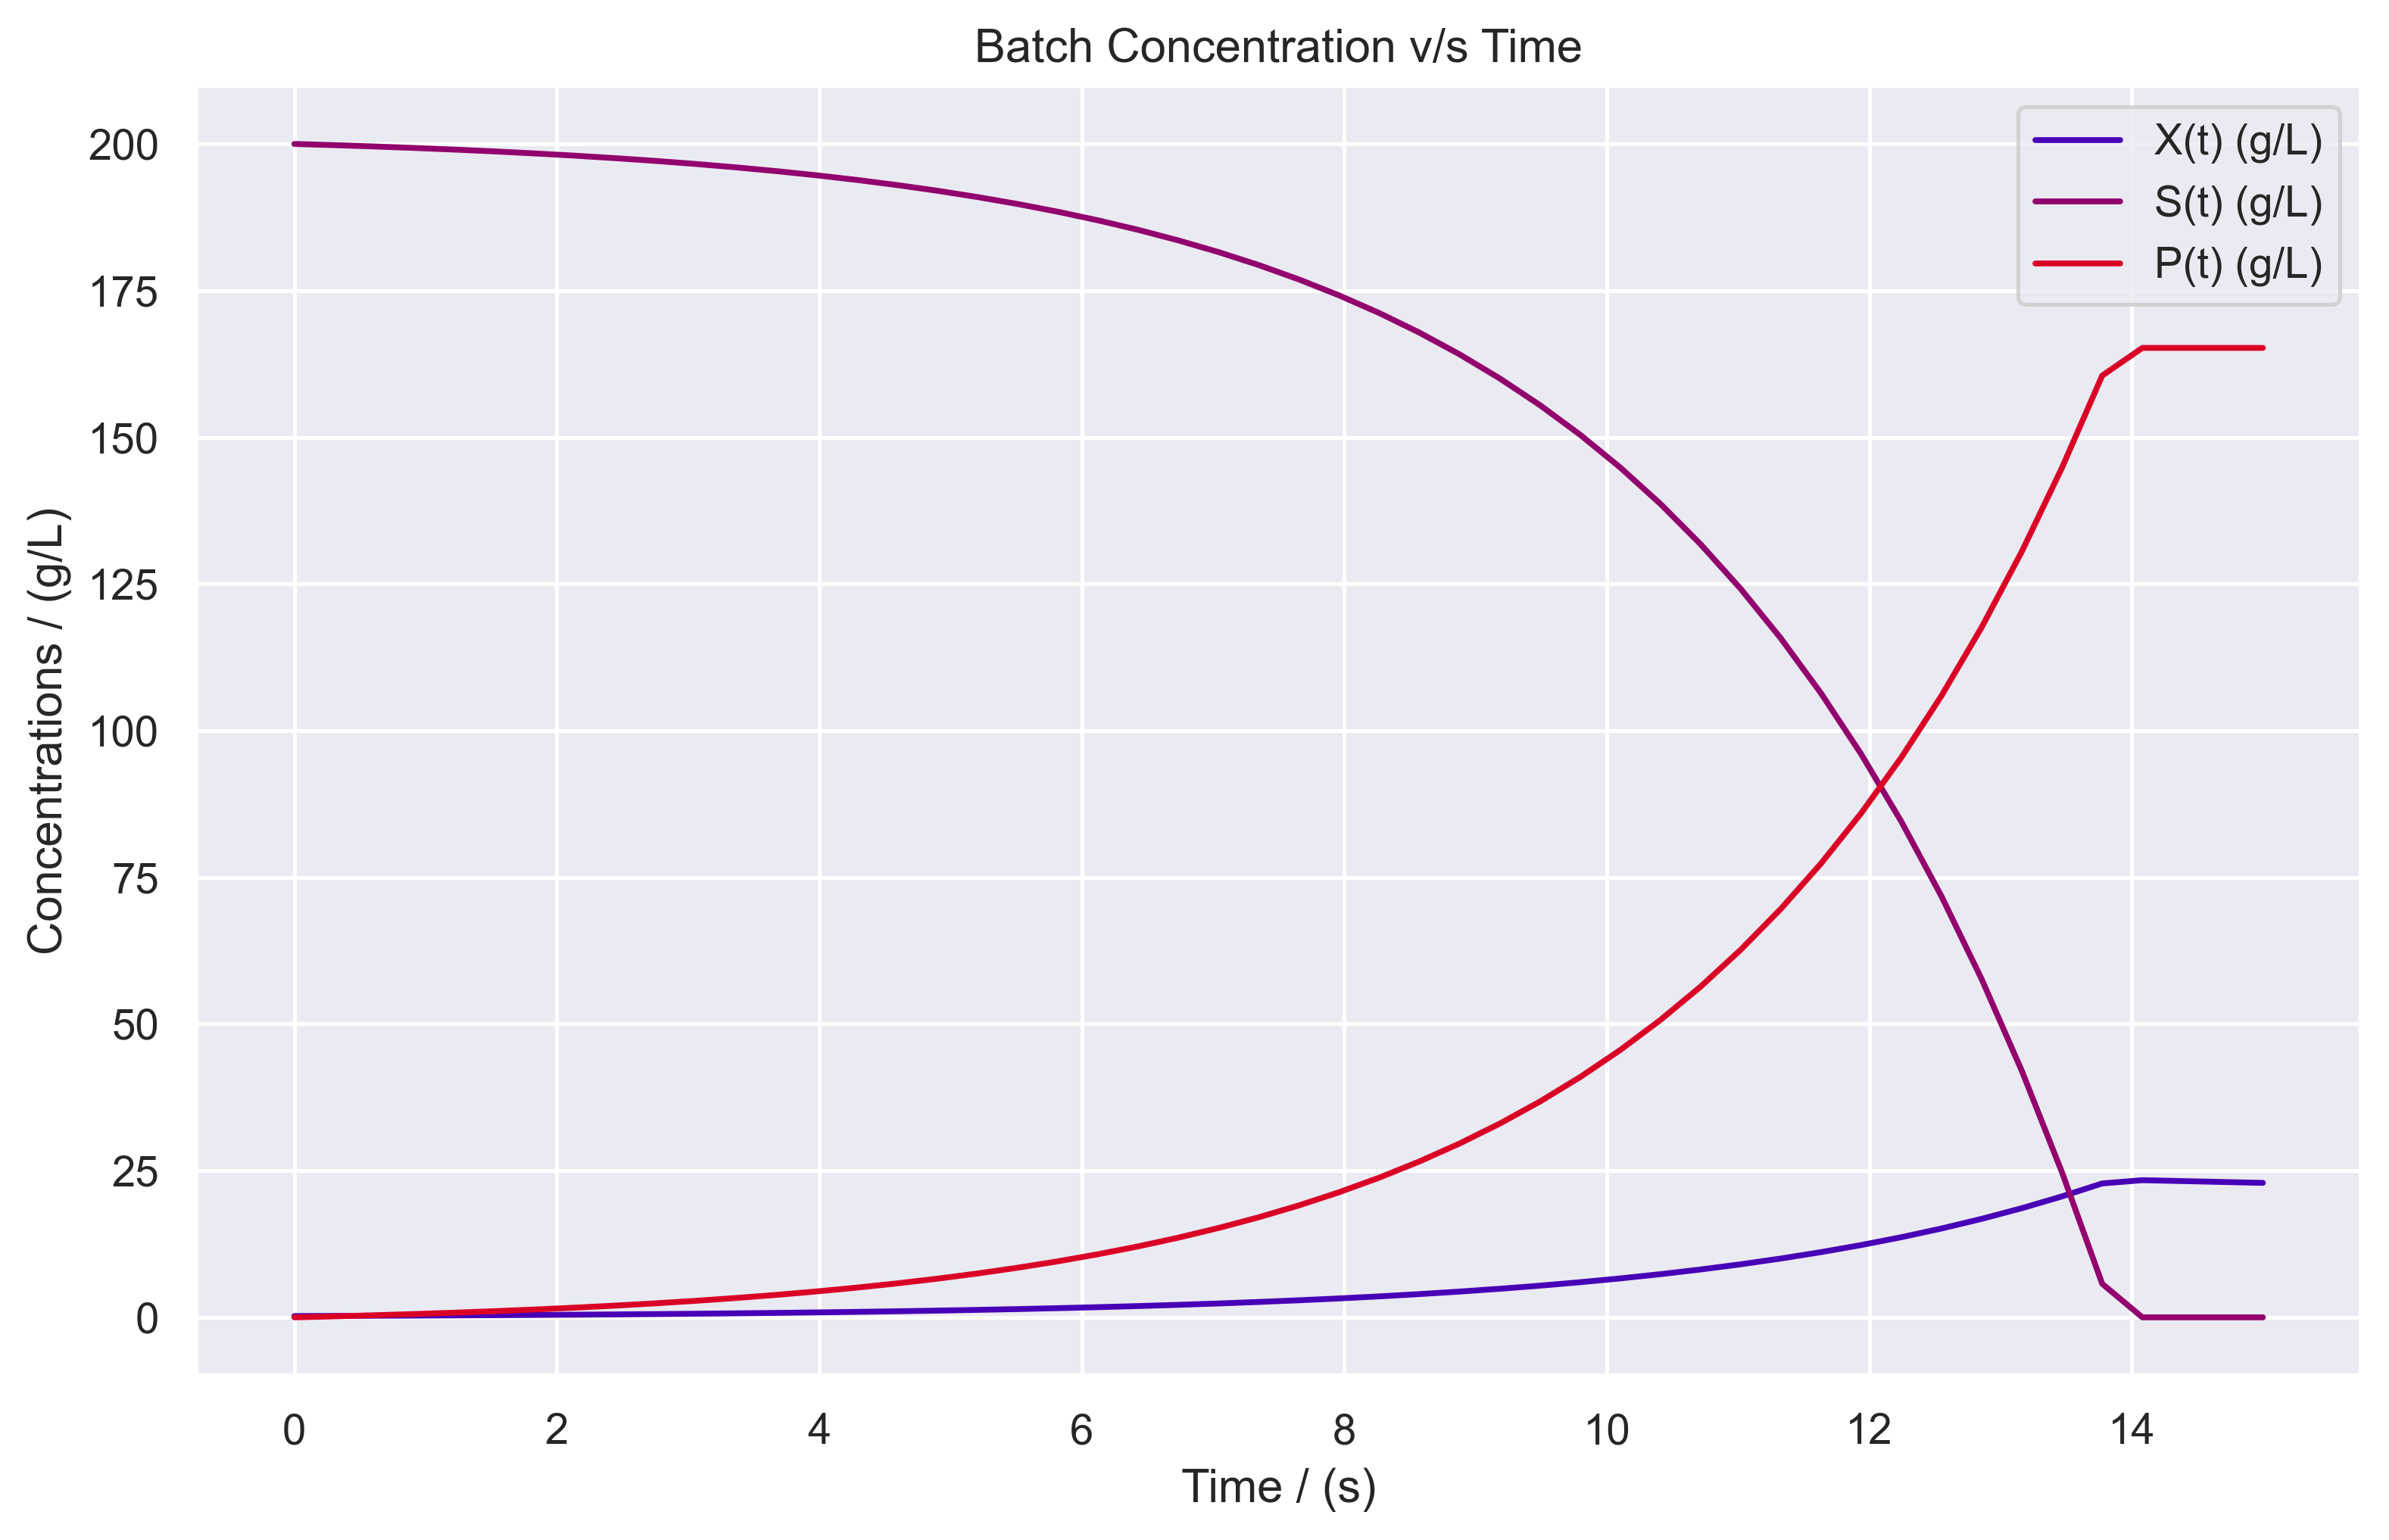

Max Lactate Titer =  165.24000000000404 g/L
Max Lactate Yield (Y_ps) =  0.8262000000000203 g/g
Max Lactate Productivity =  1.0246841089011243 g/L/hr
Complete Batch Time =  21.081632653061227 hrs


In [3]:
# Define the model
def Batch(y, t, mu_hat, K_S, K_d, Y_X_S, Y_P_S):
    X, S, P = y
    dXdt = (mu_hat * (S / (K_S + S)) - K_d) * X
    dSdt = -mu_hat / Y_X_S * (S / (K_S + S)) * X#(X_0 + Y_X_S * (S_0 - S))
    dPdt = -Y_P_S * dSdt
    return [dXdt, dSdt, dPdt]

# Time points
t = np.linspace(0, 15)

# Solve ODE
y = odeint(Batch, [X_0, S_0, P_0], t, args=(mu_hat, K_S, K_d, Y_X_S, Y_P_S))

# Plot results
plt.figure(figsize=(10, 6), dpi=369)
sns.lineplot(x=t, y=y[:, 0], label='X(t) (g/L)')
sns.lineplot(x=t, y=y[:, 1], label='S(t) (g/L)')
sns.lineplot(x=t, y=y[:, 2], label='P(t) (g/L)')
plt.title('Batch Concentration v/s Time')
plt.xlabel('Time / (s)')
plt.ylabel('Concentrations / (g/L)')
plt.legend(loc='best')
plt.show()

# Finding Productivity (g/L/hr)
# Find the index of the maximum dPdt value
max_dPdt_index = np.argmax(np.abs(y[:, 2][1:] - y[:, 2][:-1]))

# Get the corresponding time point
t_max_dPdt = t[max_dPdt_index]

# Calculate dPdt at t_max_dPdt
max_dPdt = (y[max_dPdt_index + 1, 2] - y[max_dPdt_index, 2]) / (t[max_dPdt_index + 1] - t[max_dPdt_index])

# Calculate the productivity of P in g/L/hr
Batch_productivity = max_dPdt / V_0

# Important Variables
print('Max Lactate Titer = ', max(y[:,2]), 'g/L')
print('Max Lactate Yield (Y_ps) = ', max(y[:,2] / max(y[:,1])), 'g/g')
print('Max Lactate Productivity = ', Batch_productivity, 'g/L/hr')
print('Complete Batch Time = ', t[np.argmax(y[:, 2])] + t_l, 'hrs')

b) The total time to complete a batch cycle ($t_{c}$) can also be determined using the following formula:

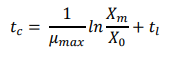

Where, $X_{m}$ is the maximal attainable biomass concentration and $t_{l}$ is the time required for the lag phase, harvesting, and preparation. Verify that the formula produces a reasonable result.

In [4]:
# Cycle Time t_c Equation
t_c = ((1 / mu_hat) * np.log(X_m / X_0)) + t_l

print(f'The Batch Cycle Time =', t_c, 'hrs\n')

print('The formula provides reasonable results as the batch time provided by this equation is less than the one found in part a, purely because this equation does not account for cell decay and maintainence times.')

The Batch Cycle Time = 20.151686739429124 hrs

The formula provides reasonable results as the batch time provided by this equation is less than the one found in part a, purely because this equation does not account for cell decay and maintainence times.


c) You do some test experiments using a lab-scale bioreactor and get drastically lower productivities than expected. Your colleague suggests that the high glucose feed might be inhibiting cell growth (termed substrate inhibition). Additionally, you may also be getting product inhibition, where product accumulation reduces the net growth rate. One possible model to describe this growth inhibition is shown below:

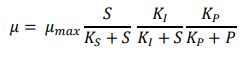

Where values for $K_{I}$ (substrate inhibition constant) and $K_{P}$ (product inhibition constant) were based on experimental measurements taken from the literature for glucose $K_{I}$ =3 25 g/L) and lactate $K_{P}$ = 9.5 g/L), respectively. Considering this information, what is your revised batch cycle time? Quantify how much substrate and product inhibition reduced lactate productivity (g/L/d) and yield (g/g).

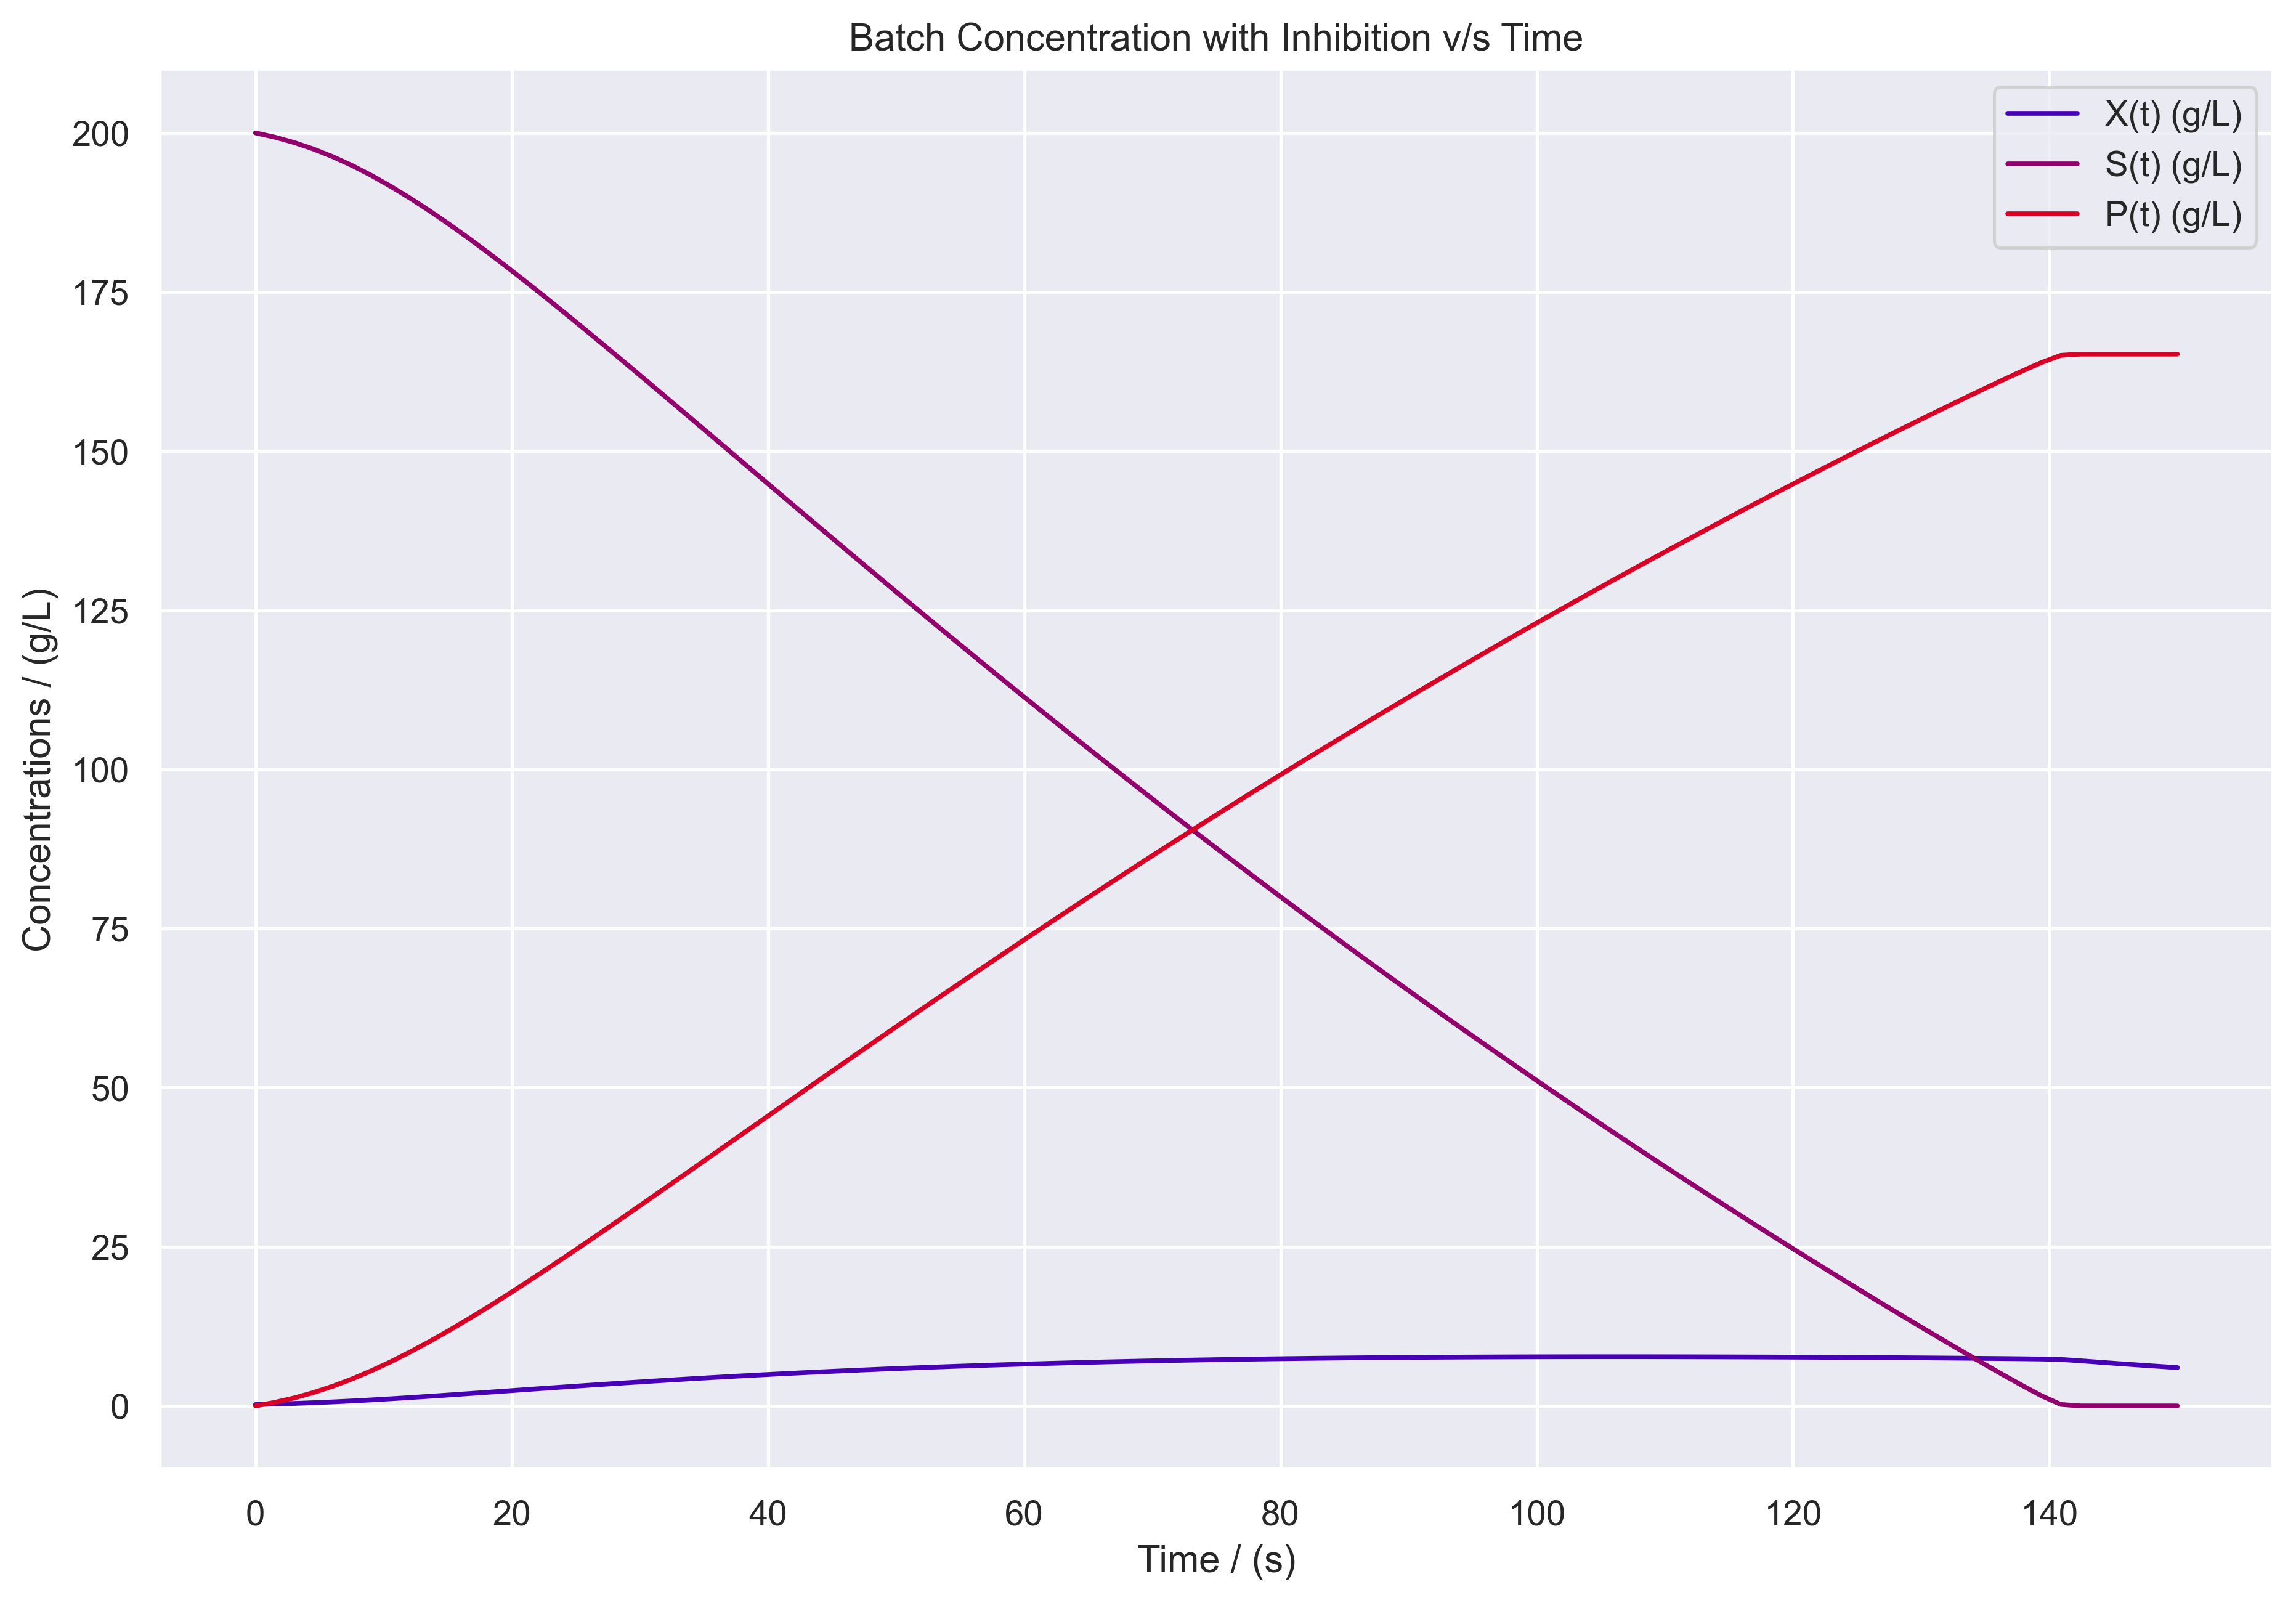

Max Lactate Titer =  165.24000001206014 g/L
Max Lactate Yield (Y_ps) =  0.8262000000603007 g/g
Max Lactate Productivity =  0.02826189397121029 g/L/hr
Complete Batch Time =  152.45454545454544 hrs


In [5]:
# Differential equations
def BatchwInhibition(Z, t):
    X, S, P = Z
    mu = mu_hat * (S / (K_S + S)) * (K_I / (K_I + S)) * (K_P / (K_P + P))
    dXdt = (mu - K_d) * X
    dSdt = -mu * X / Y_X_S
    dPdt = -Y_P_S * dSdt
    return [dXdt, dSdt, dPdt]

# Time points
t = np.linspace(0, 150, 100) # for example, from 0 to 10 hours

# Solve ODE
Z = odeint(BatchwInhibition, [X_0, S_0, P_0], t)

# Plotting Results
plt.figure(figsize=(12, 8), dpi = 369)
sns.lineplot(x=t, y=Z[:, 0], label='X(t) (g/L)')
sns.lineplot(x=t, y=Z[:, 1], label='S(t) (g/L)')
sns.lineplot(x=t, y=Z[:, 2], label='P(t) (g/L)')
plt.title('Batch Concentration with Inhibition v/s Time')
plt.xlabel('Time / (s)')
plt.ylabel('Concentrations / (g/L)')
plt.legend(loc='best')
plt.show()

# Finding Productivity (g/L/hr)
# Find the index of the maximum dPdt value
max_dPdt_index = np.argmax(np.abs(Z[:, 2][1:] - Z[:, 2][:-1]))

# Get the corresponding time point
t_max_dPdt = t[max_dPdt_index]

# Calculate dPdt at t_max_dPdt
max_dPdt = (Z[max_dPdt_index + 1, 2] - Z[max_dPdt_index, 2]) / (t[max_dPdt_index + 1] - t[max_dPdt_index])

# Calculate the productivity of P in g/L/hr
BatchwI_productivity = max_dPdt / V_0

# Important Variables
print('Max Lactate Titer = ', max(Z[:,2]), 'g/L')
print('Max Lactate Yield (Y_ps) = ', max(Z[:,2] / max(Z[:,1])), 'g/g')
print('Max Lactate Productivity = ', BatchwI_productivity, 'g/L/hr')
print('Complete Batch Time = ', t[np.argmax(Z[:, 2])] + t_l, 'hrs')

In [6]:
print('Reduction in Productivity = ', (Batch_productivity - BatchwI_productivity) * 24 , 'g/L/day')
print('Reduction in Lactate Yield = ', (max(Z[:,2] / max(Z[:,1]))) - (max(y[:,2] / max(y[:,1]))), 'g/g')

Reduction in Productivity =  23.914133158317938 g/L/day
Reduction in Lactate Yield =  6.028044730044257e-11 g/g


d) You run some further lab tests and determine product inhibition becomes worse as pH decreases. Based on your knowledge of acid/base chemistry and ion transport across biological membranes, proposed a reason for why this occurs. Considering acetic acid and lactic acid can both be products of lactic acid fermentation, which product would you expect to inhibit LAB more at $pH$ 5? Explain. Additionally, provide a comment on the limitations of using $K_{P}$ in the above expression.

**`For an industrial process, the best fermentation pathway would be the one that maximizes product yield, productivity, and economic efficiency while minimizing by-products and input costs.`**

**`Homolactic fermentation, which converts glucose directly to lactate, is typically more desirable for industrial lactic acid production because it produces lactate as the sole fermentation end product, which simplifies downstream processing and increases the purity of the product.`** 

**`This pathway is energetically favorable as it produces 2 ATP per glucose molecule, which is beneficial for the growth and maintenance of the cells.`** 

**`In contrast, heterolactic fermentation produces lactate along with other by-products such as ethanol, CO2, and acetate, which can complicate product recovery and reduce the overall yield of the desired product, lactate. Additionally, the "Bifidobacterium shunt" pathway of heterolactic fermentation is less favorable due to the production of 3 acetate and 2 lactate from 2 glucose molecules, which is a less efficient conversion in terms of lactate yield`**

3. **(Continuous bioreactor)** Instead of a batch process, you proposed that a CSTR might avoid product inhibition and result in greater productivities. 

a) Provide an explanation for this statement using words and calculations.

**`A Continuous Stirred-Tank Reactor (CSTR) can help avoid product inhibition and increase productivity by continuously removing the fermentation products from the reactor as part of the effluent. This continuous removal prevents the accumulation of inhibitory products such as lactate, which can slow down or inhibit microbial growth and fermentation if allowed to build up to high concentrations.`**

**`By maintaining lower concentrations of the inhibitory products, the CSTR can sustain a higher microbial growth rate and, consequently, a higher rate of lactic acid production.`** 

**`Additionally, the continuous operation allows for a steady state to be reached, where the rate of input (substrate) and output (product and cells) are balanced, leading to potentially higher and more consistent productivities compared to batch processes.`**

b) If the influent glucose concentration is 200 g/L, plot the concentration of lactate, glucose, and biomass as a function of dilution rate. What dilution rate maximizes lactate production? What dilution rate would you recommend for the full-scale process? Explain.

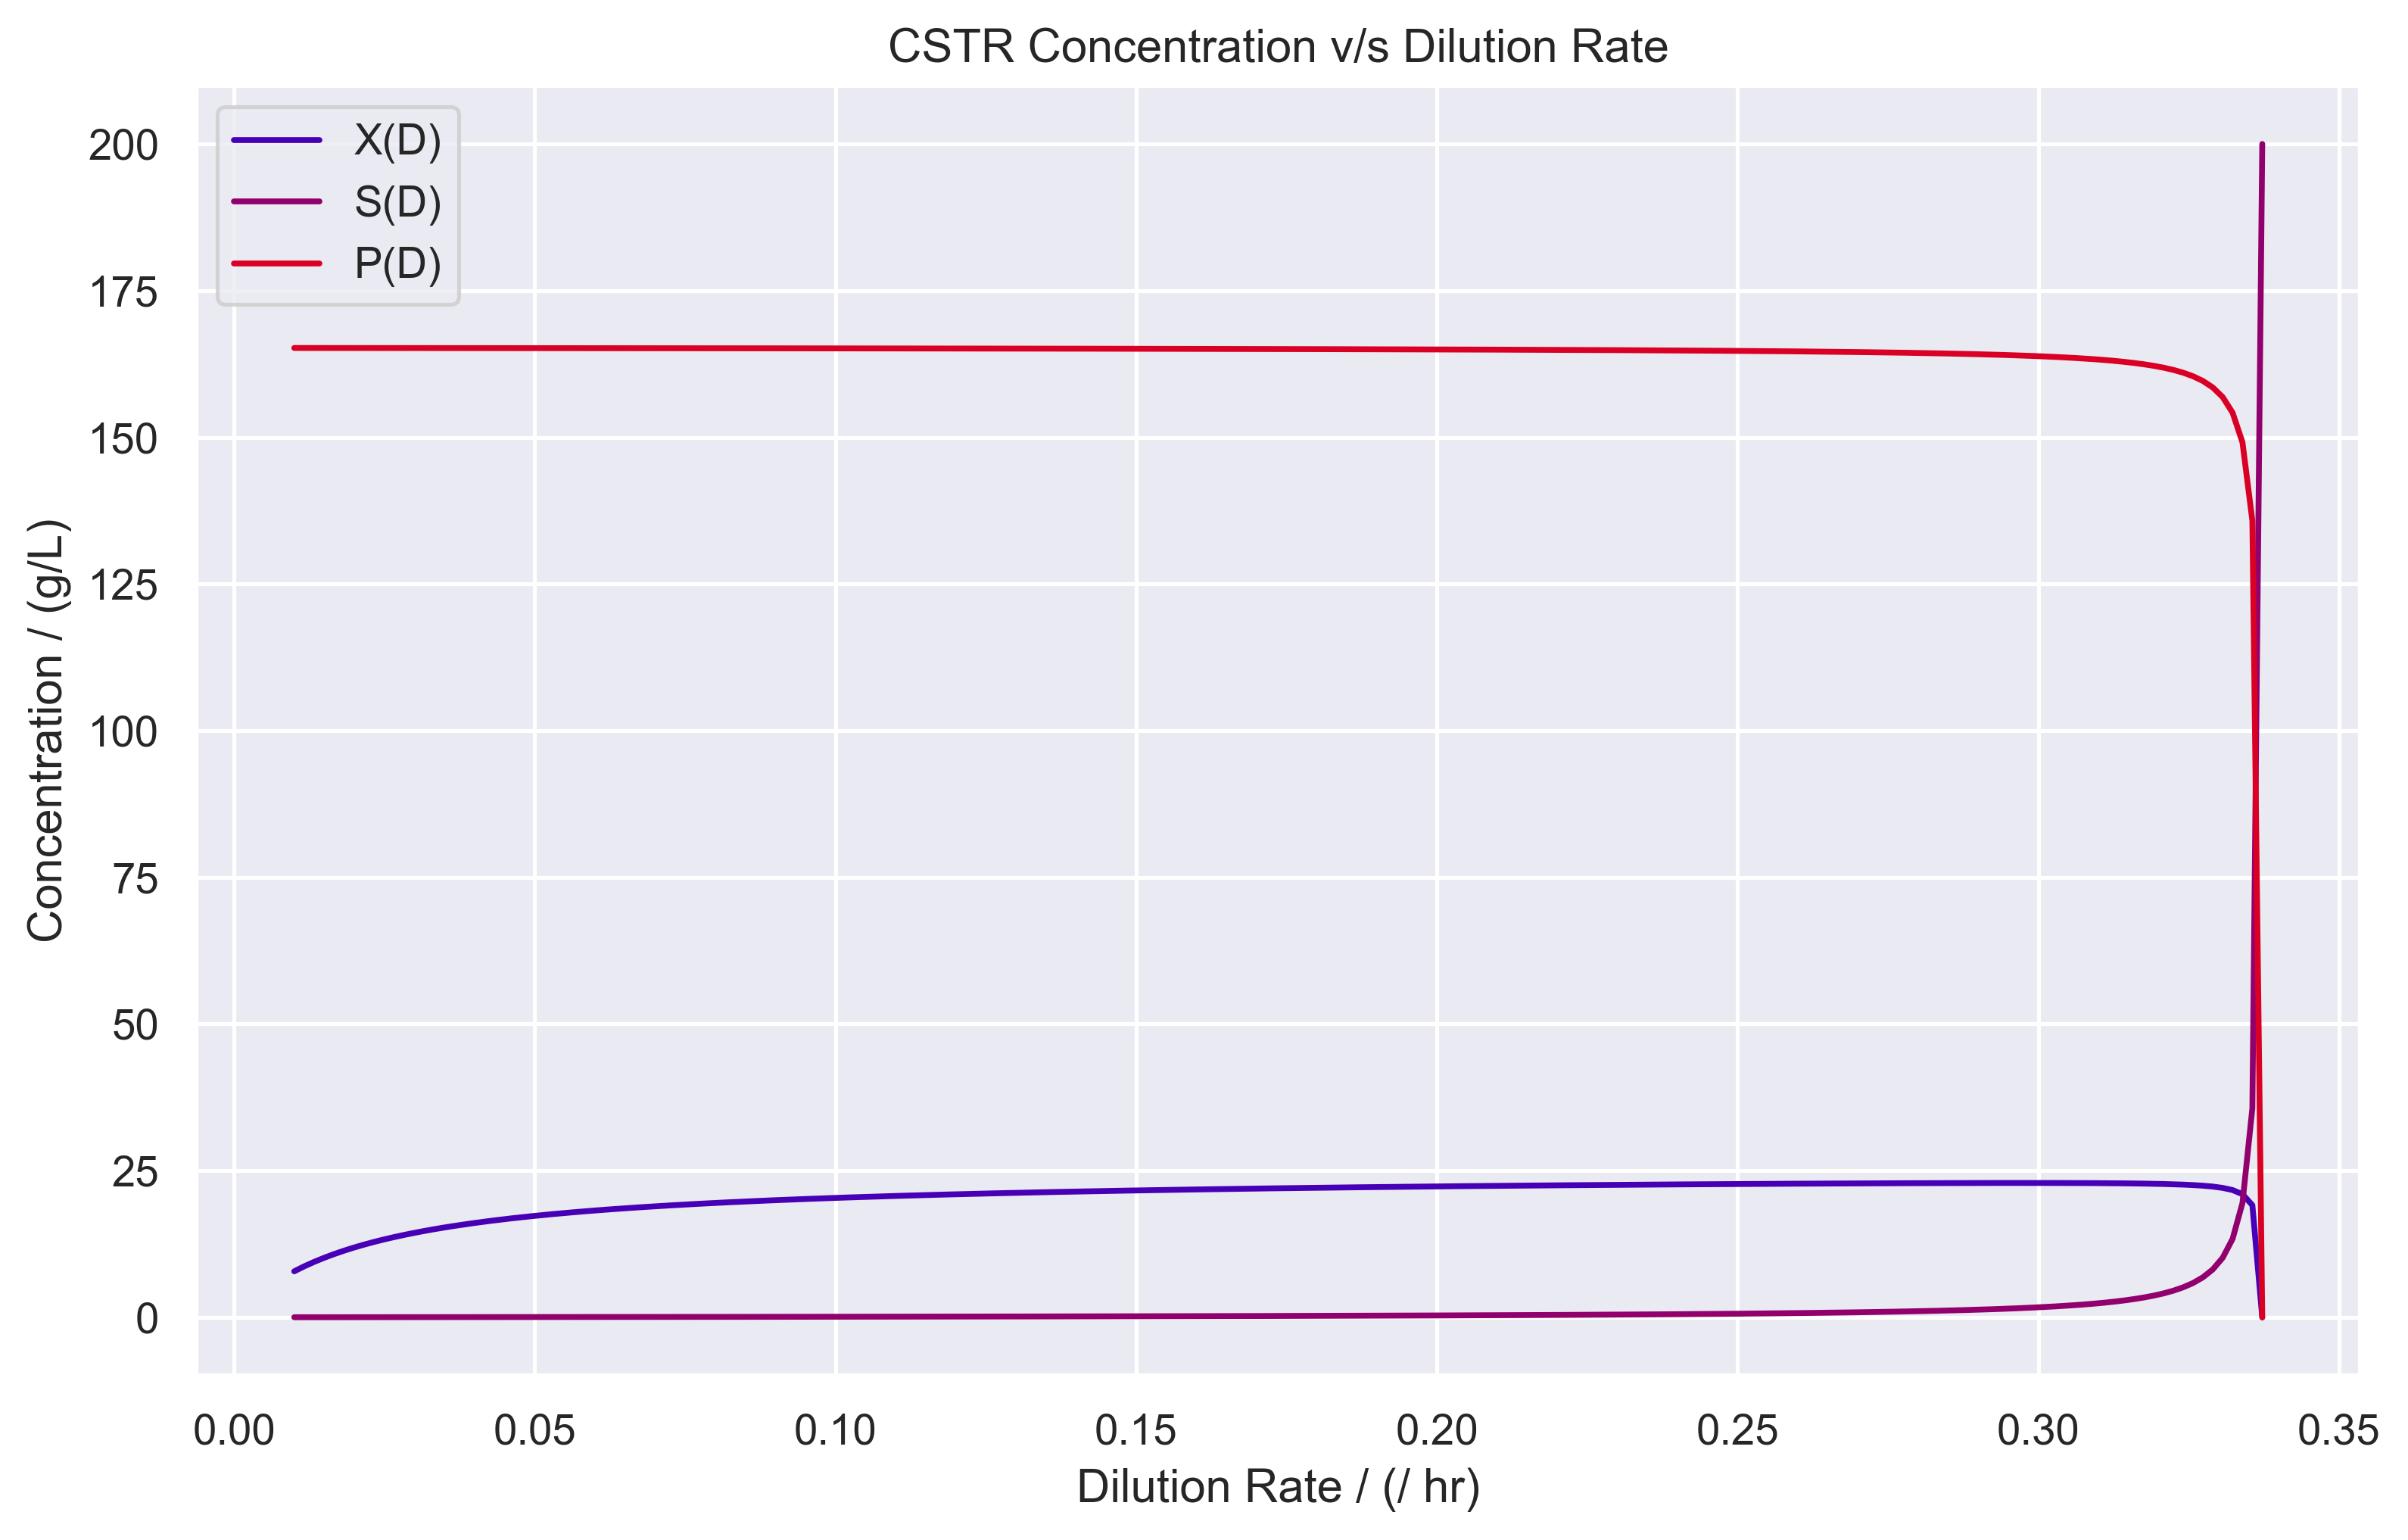

D_max =  0.3372371315521478 / hr
Max Lactate Concentration =  165.22408678840011 g/L
Max Lactate Yield (Y_ps) =  0.8261204339420223 g/g


In [7]:
# Parameters
D_max = mu_hat * (S_0 / (K_S + S_0)) - K_d

# D values
D = np.linspace(0.01, D_max, 200)

# CSTR Equations
S = (K_S * (D + K_d) / (mu_hat - (D + K_d)))
X = (Y_X_S * (S_0 - S) * D / (D + K_d))
P = (P_0 + Y_P_X * X * (D + K_d) / D)

# Plotting Results
plt.figure(figsize=(10,6), dpi=369)
sns.lineplot(x=D, y=X, label='X(D)')
sns.lineplot(x=D, y=S, label='S(D)')
sns.lineplot(x=D, y=P, label='P(D)')
plt.title('CSTR Concentration v/s Dilution Rate')
plt.ylabel('Concentration / (g/L)')
plt.xlabel('Dilution Rate / (/ hr)')
plt.legend(loc='best')
plt.show()

# Neccessary values from Graph
print('D_max = ', D_max, '/ hr')
print('Max Lactate Concentration = ', max(P), 'g/L')
print('Max Lactate Yield (Y_ps) = ', max(P)/max(S), 'g/g')

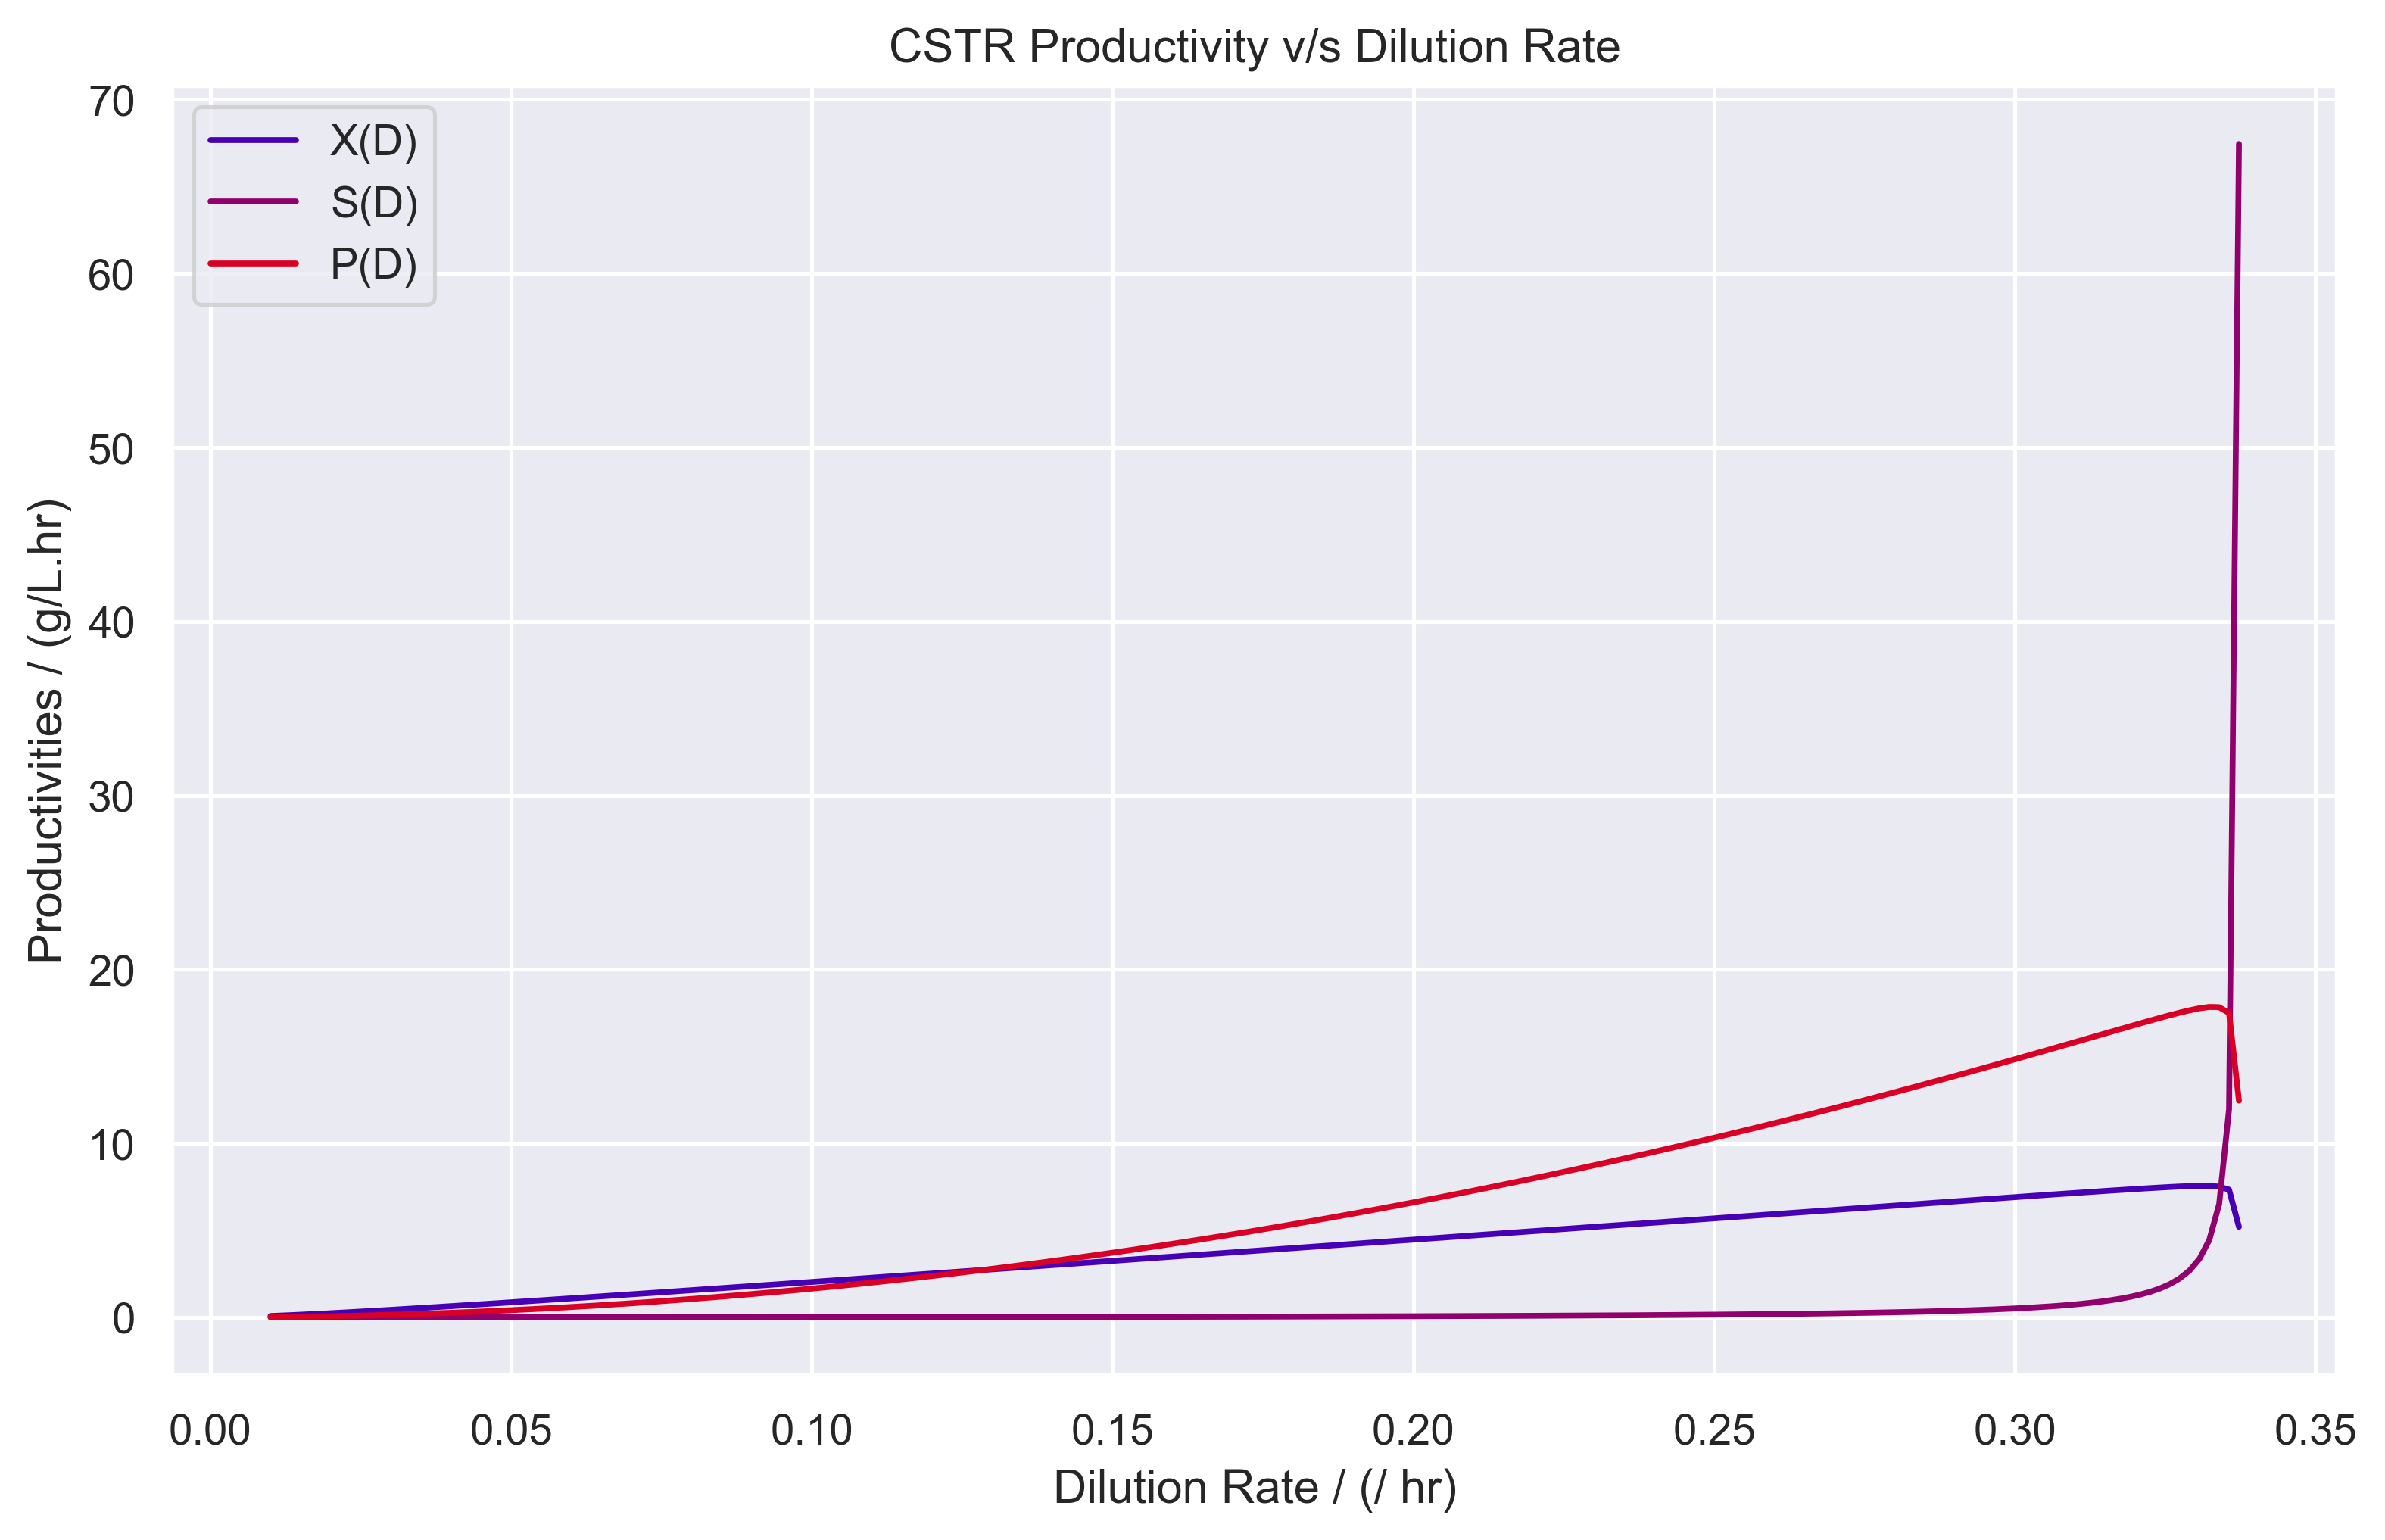

D_max =  0.3372371315521478 / hr
Max Lactate Productivity =  17.84133670056005 g/L/hr
Dilution rate corresponding to Max Lactate Productivity =  0.33230390846342195 / hr


In [8]:
# Parameters
D_max = mu_hat * (S_0 / (K_S + S_0)) - K_d

# D values
D = np.linspace(0.01, D_max, 200)

# Equations
S = (K_S * (D + K_d) / (mu_hat - (D + K_d))) * D
X = (Y_X_S * (S_0 - S) * D / (D + K_d)) * D
P = (P_0 + (Y_P_X) * X * (D + K_d) / D) * D

# Plotting Results
plt.figure(figsize=(10,6), dpi=369)
sns.lineplot(x=D, y=X, label='X(D)')
sns.lineplot(x=D, y=S, label='S(D)')
sns.lineplot(x=D, y=P, label='P(D)')
plt.title('CSTR Productivity v/s Dilution Rate')
plt.ylabel('Productivities / (g/L.hr)')
plt.xlabel('Dilution Rate / (/ hr)')
plt.legend(loc='best')
plt.show()

# Neccessary values from Graph
print('D_max = ', D_max, '/ hr')
print('Max Lactate Productivity = ', max(P), 'g/L/hr')
print(f'Dilution rate corresponding to Max Lactate Productivity = ', D[np.argmax(P)], '/ hr')

c) Your colleague suggests that you add a cell separator (e.g., sedimentation tank, centrifuge, membrane filter) and recycle system to your CSTR to increase cell density and product yield per unit volume per unit time as shown in the figure below. 

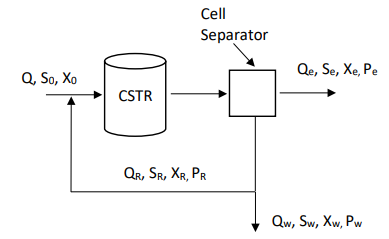

From a mass balance analysis, determine equations and values for the steady-state cell, glucose, and lactate concentration as a function of the dilution rate if the recycle ratio ($α$ = $Q_{R}/Q$) is 0.5, the cell concentration factor ($C$ = $X_{R}/X$) is 2, and the influent glucose concentration is 200 g/L. What dilution rate would you recommend for the full-scale process? Explain.

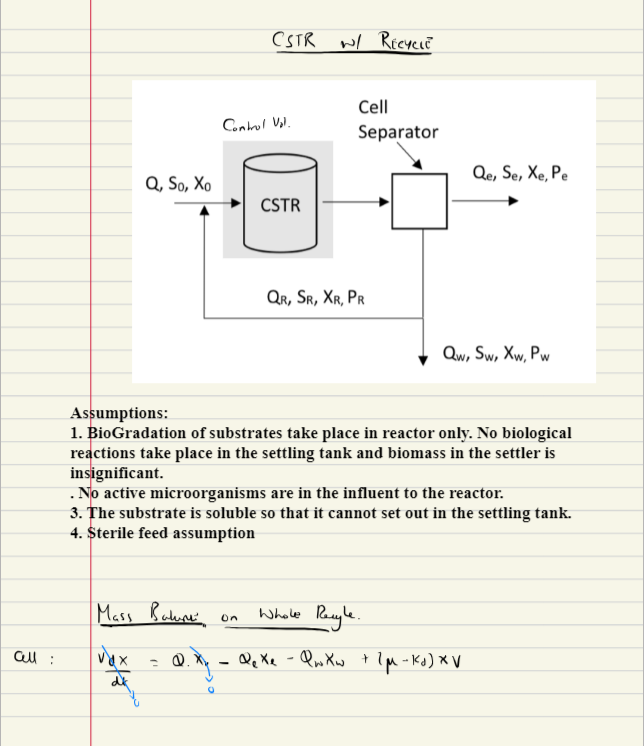

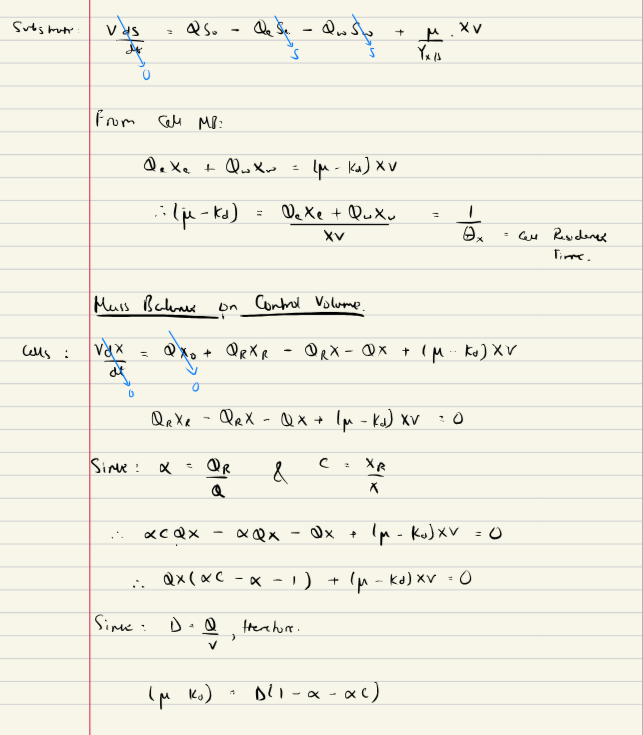

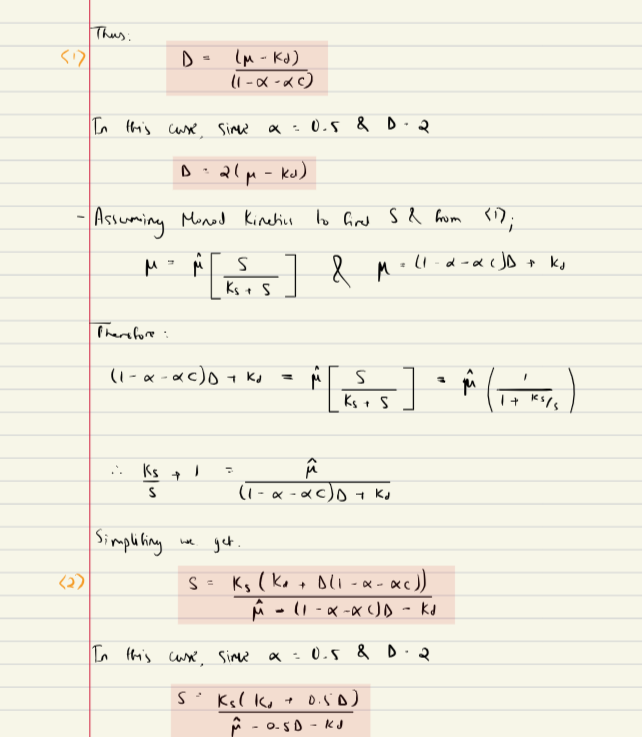

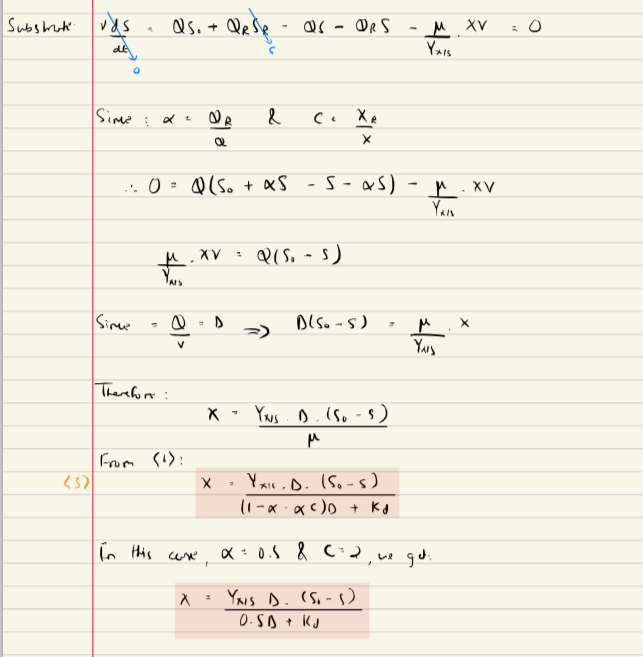

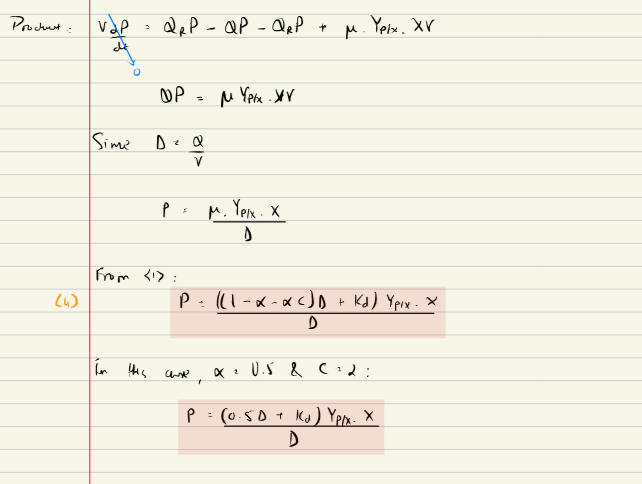

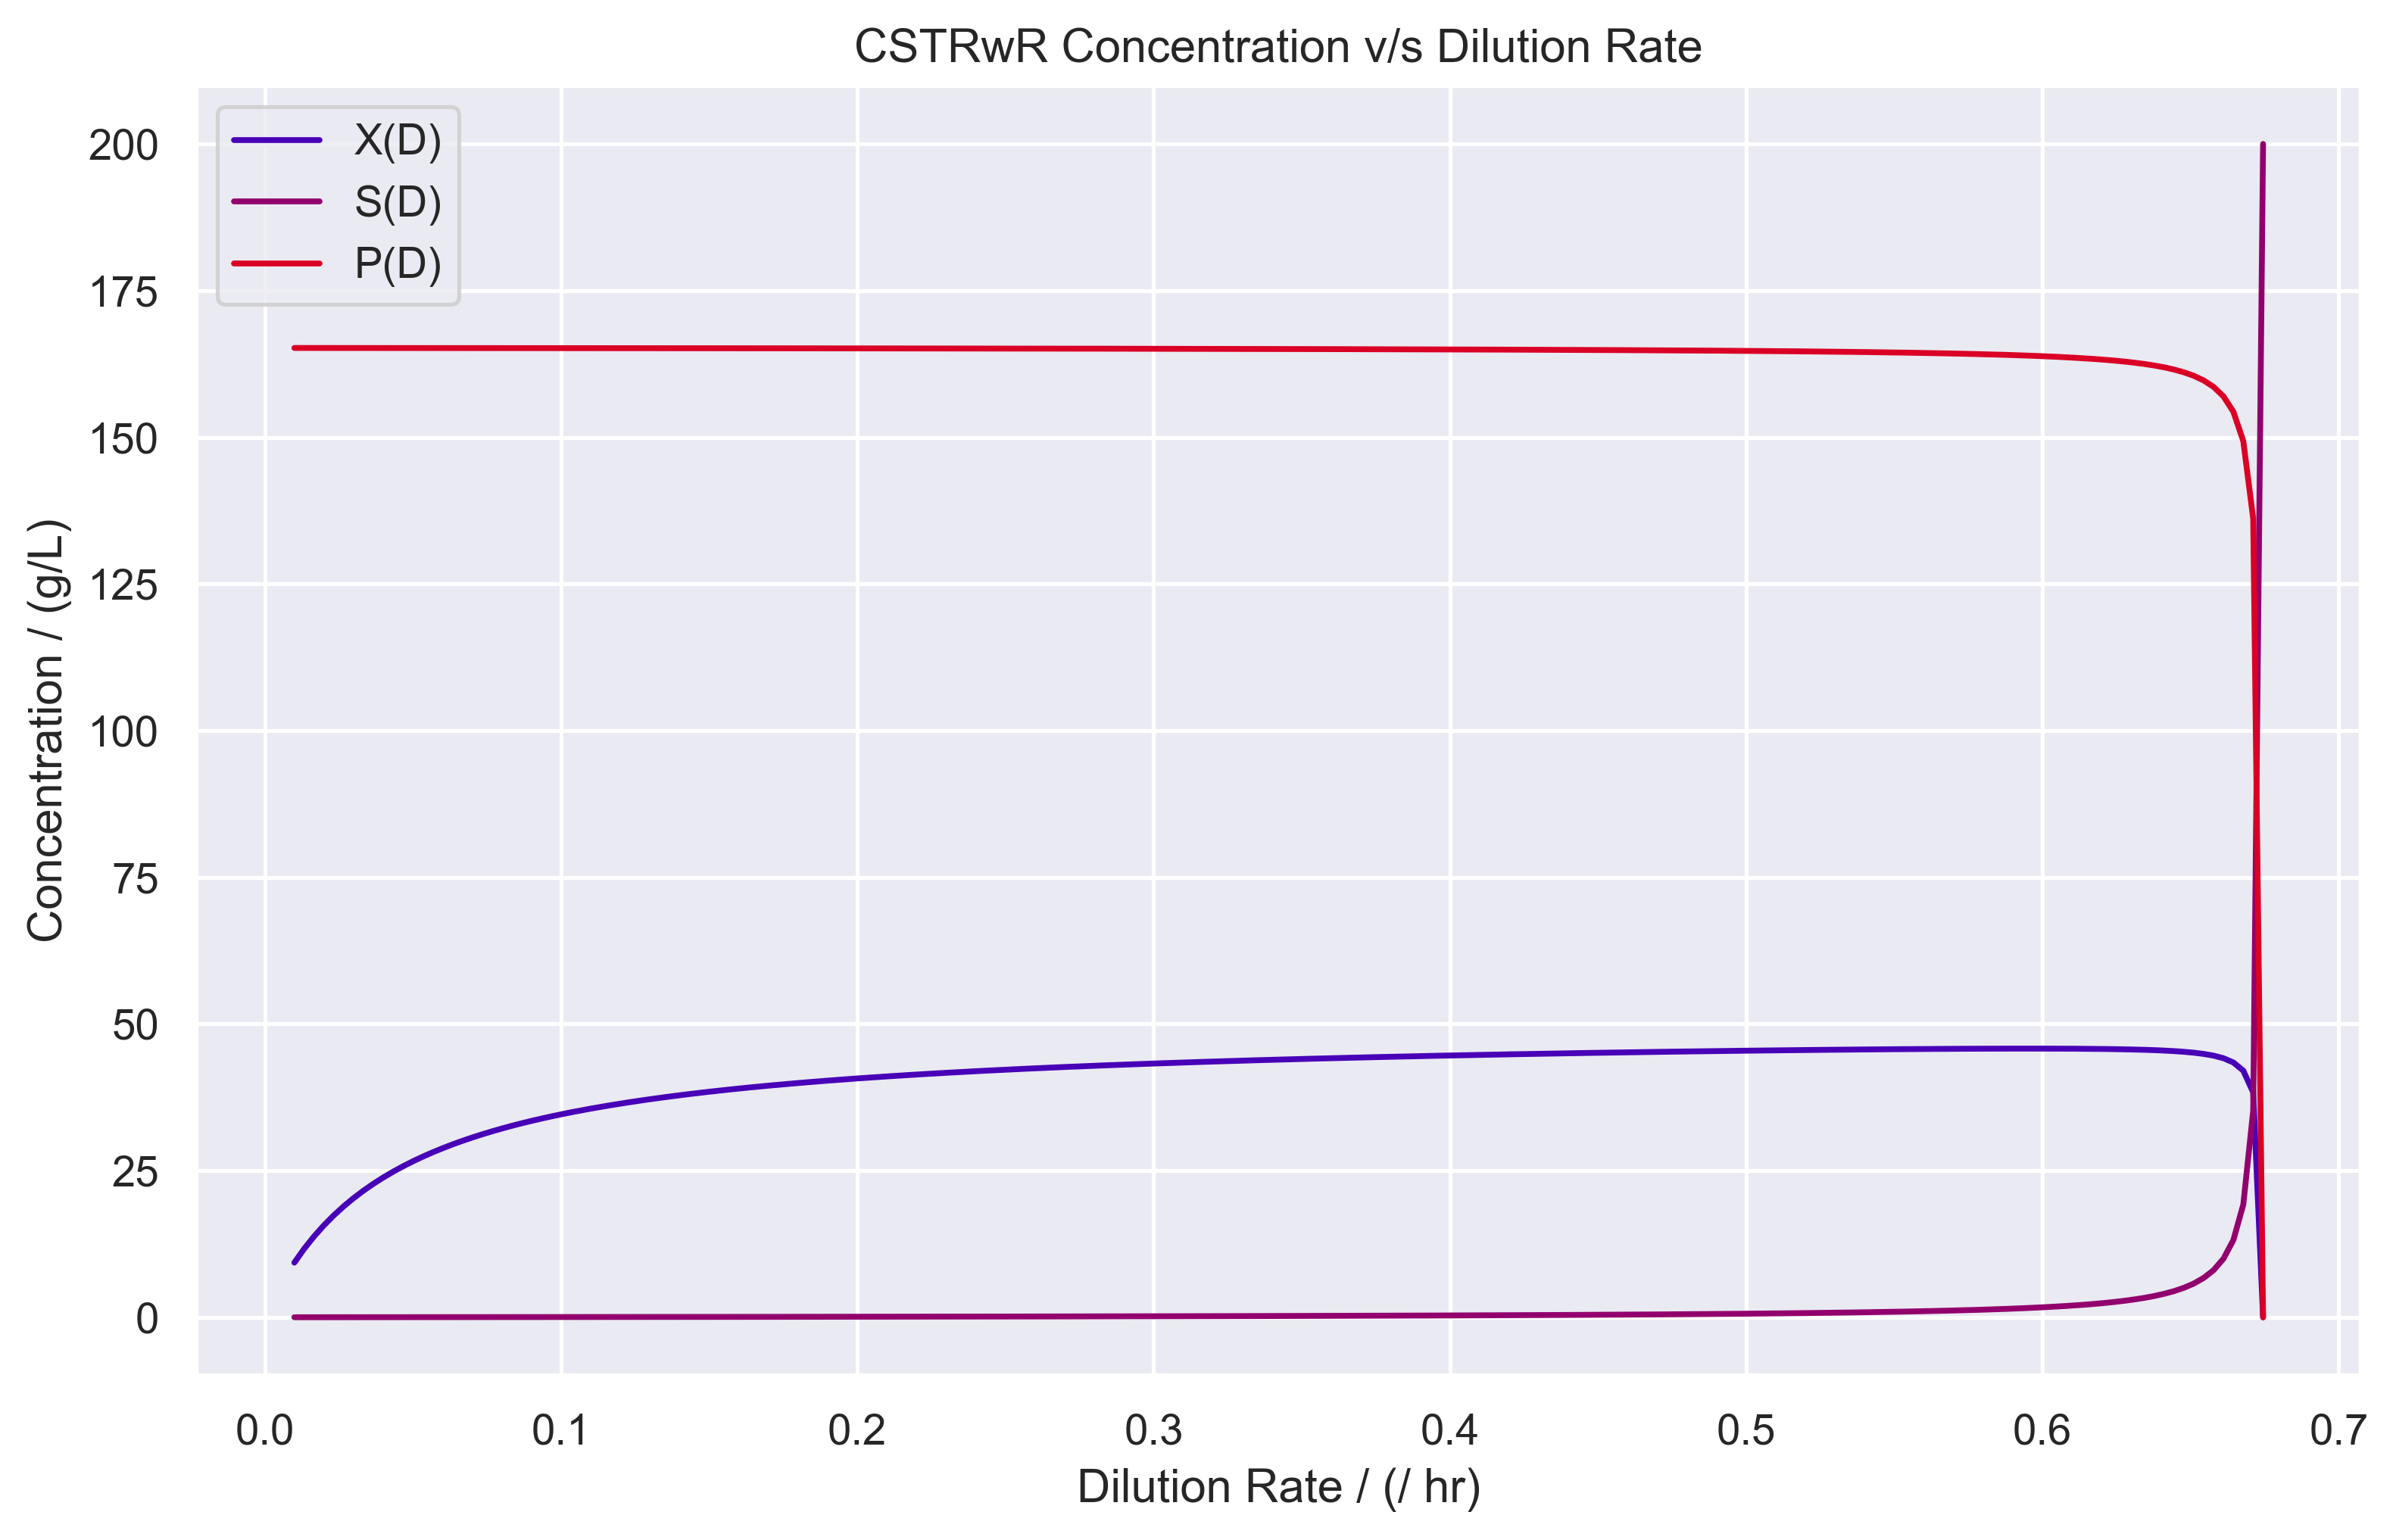

D_max =  0.6744742631042956 / hr
Max Lactate Concentration =  165.22681011123942 g/L
Max Lactate Yield (Y_ps) =  0.8261340505562188 g/g


In [9]:
# Parameters
D_max = 2 * ((S_0 * mu_hat / (K_S + S_0)) - K_d)

# D values
D = np.linspace(0.01, D_max, 200)

# Equations
S = ((K_S * (K_d + 0.5 * D)) / (mu_hat - K_d - 0.5 * D))
X = ((D * (S_0 - S) * Y_X_S) / (0.5 * D + K_d))
P = ((X * (Y_P_S / Y_X_S) * (0.5 * D + K_d)) / D)

P = [max(0, p) for p in P]

# Plotting Results
plt.figure(figsize=(10,6), dpi=369)
sns.lineplot(x=D, y=X, label='X(D)')
sns.lineplot(x=D, y=S, label='S(D)')
sns.lineplot(x=D, y=P, label='P(D)')
plt.title('CSTRwR Concentration v/s Dilution Rate')
plt.ylabel('Concentration / (g/L)')
plt.xlabel('Dilution Rate / (/ hr)')
plt.legend(loc='best')
plt.show()

# Neccessary values from Graph
print('D_max = ', D_max, '/ hr')
print('Max Lactate Concentration = ', max(P), 'g/L')
print('Max Lactate Yield (Y_ps) = ', max(P)/max(S), 'g/g')

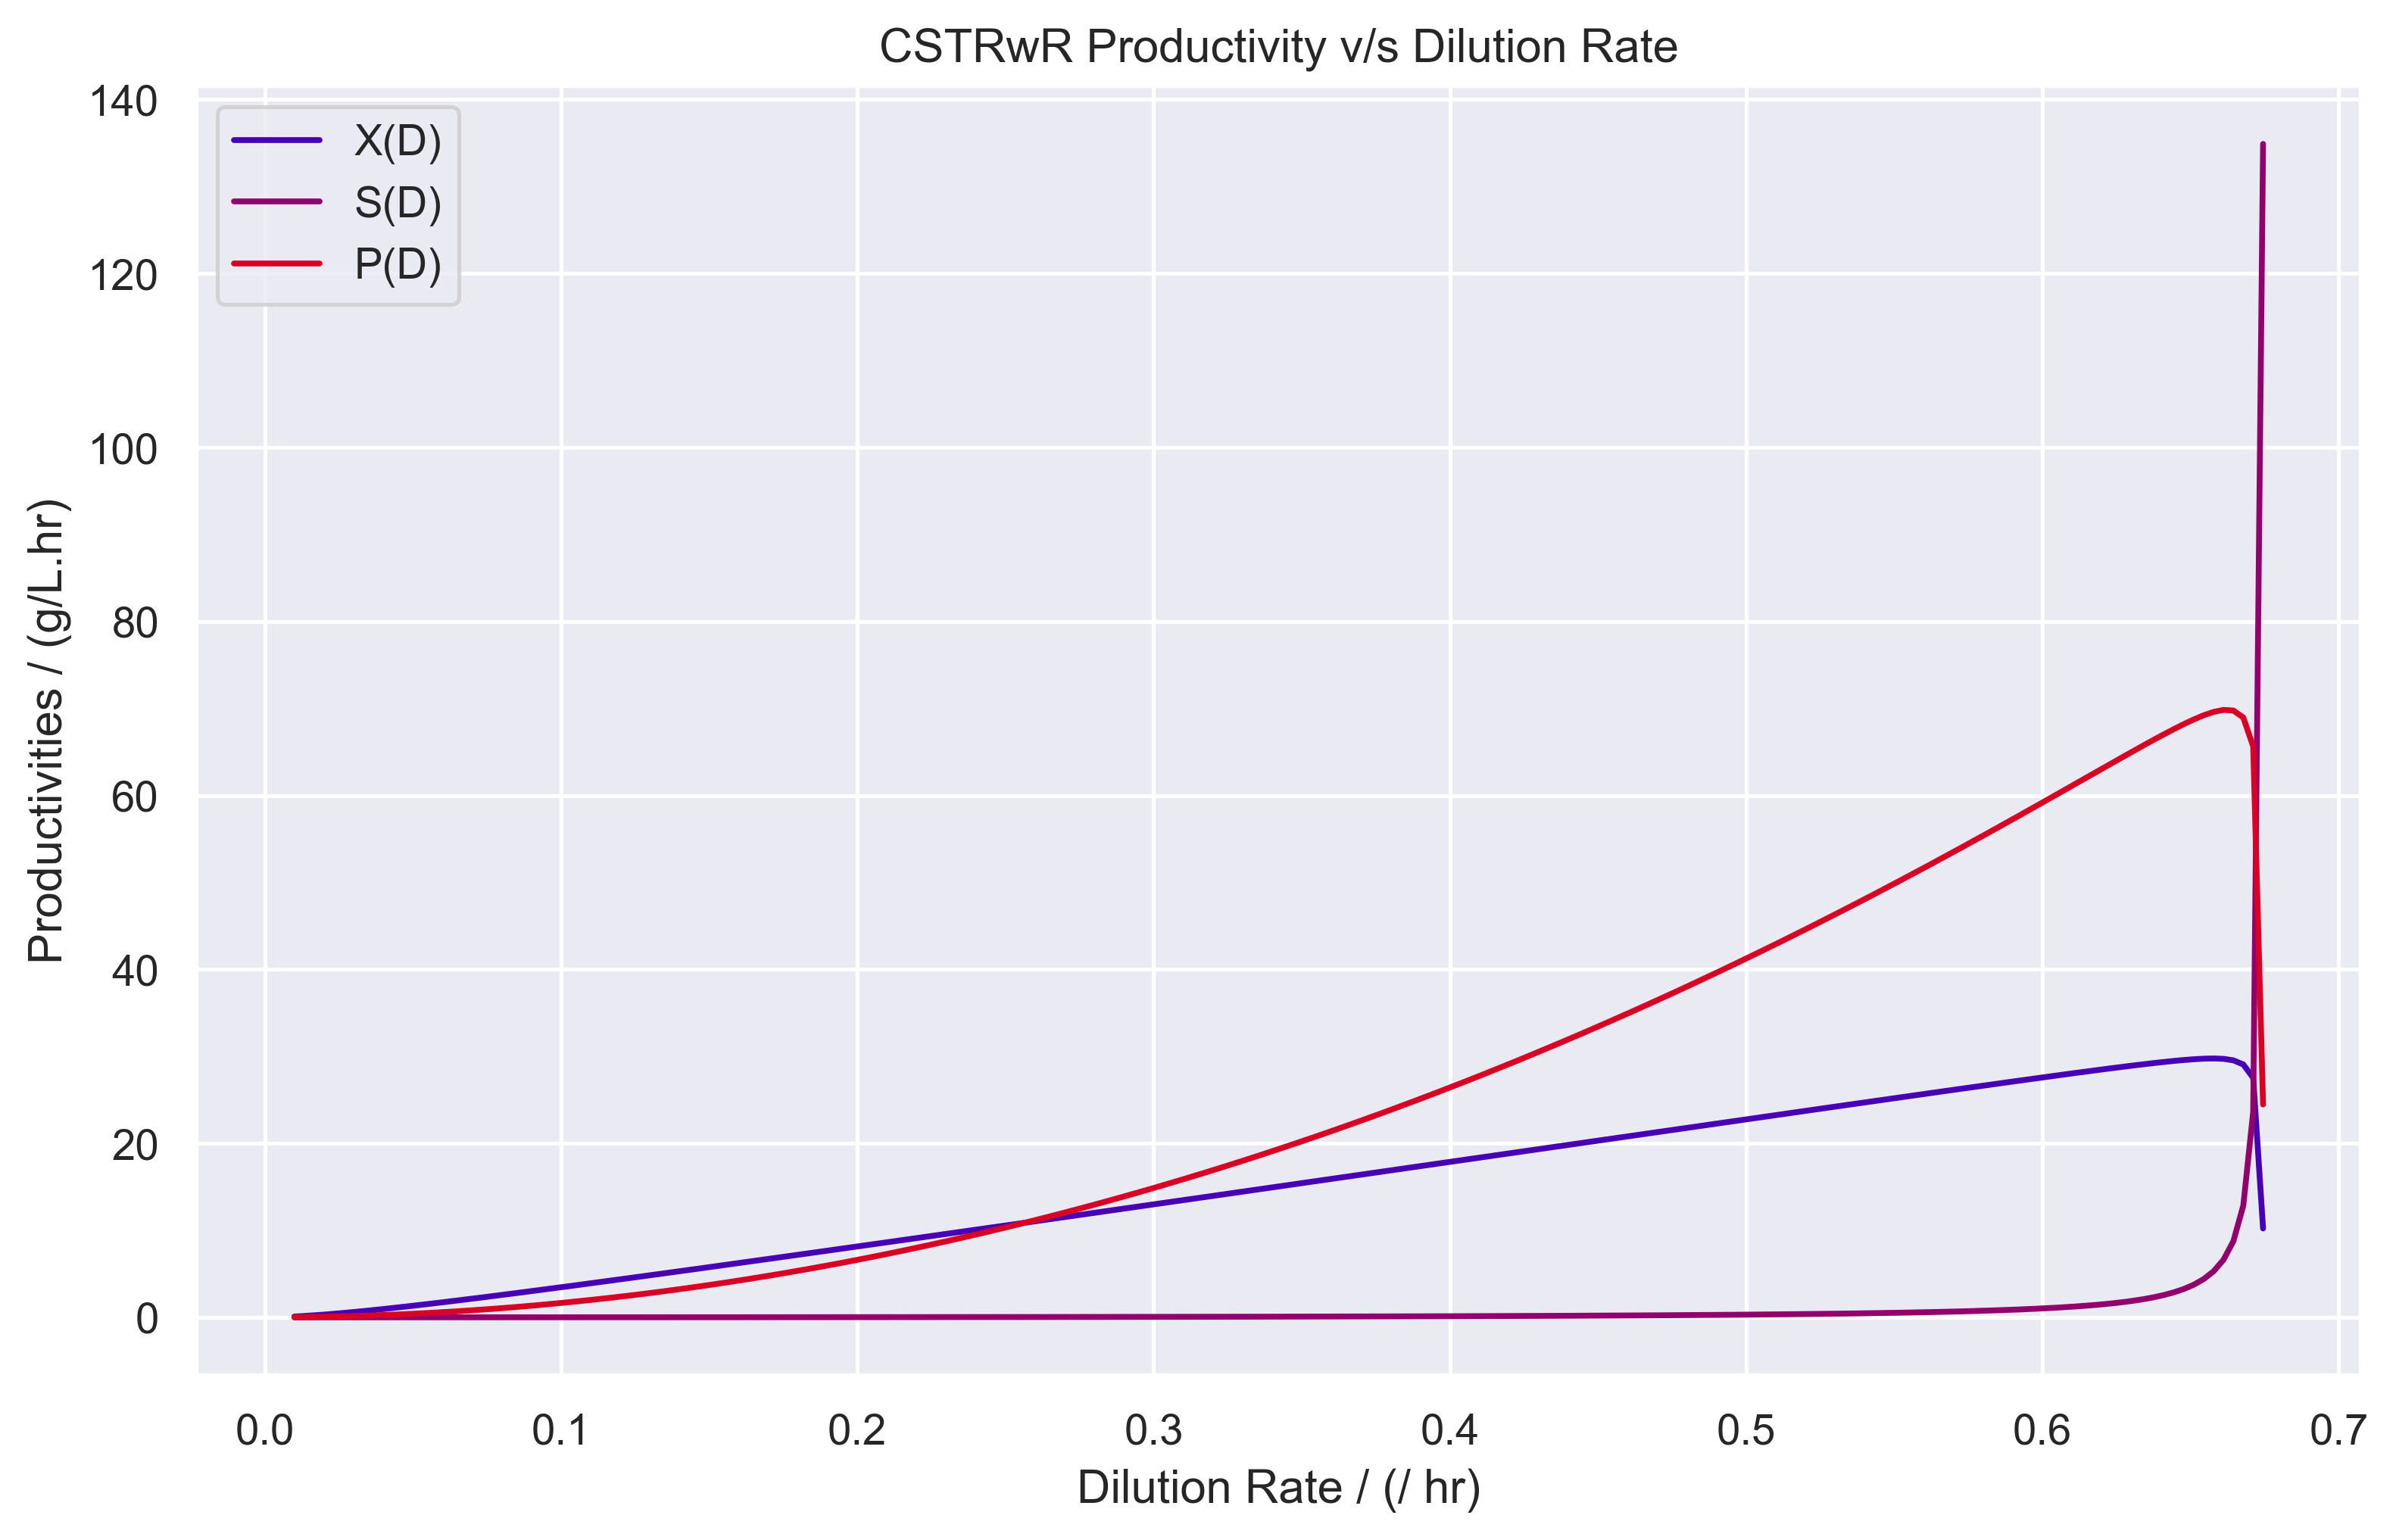

D_max =  0.6744742631042956 / hr
Max Lactate Productivity =  69.83344534109789 g/L/hr
Dilution Rate corresponding to Max Lactate Productivity =  0.6611179965092344 / hr


In [10]:
# Parameters
D_max = 2 * ((S_0 * mu_hat / (K_S + S_0)) - K_d)

# D values
D = np.linspace(0.01, D_max, 200)

# Equations
S = ((K_S * (K_d + 0.5 * D)) / (mu_hat - K_d - 0.5 * D)) * D
X = ((D * (S_0 - S) * Y_X_S) / (0.5 * D + K_d)) * D
P = ((X * (Y_P_S / Y_X_S) * (0.5 * D + K_d)) / D) * D

# Plotting Results
plt.figure(figsize=(10,6), dpi=369)
sns.lineplot(x=D, y=X, label='X(D)')
sns.lineplot(x=D, y=S, label='S(D)')
sns.lineplot(x=D, y=P, label='P(D)')
plt.title('CSTRwR Productivity v/s Dilution Rate')
plt.ylabel('Productivities / (g/L.hr)')
plt.xlabel('Dilution Rate / (/ hr)')
plt.legend(loc='best')
plt.show()

# Neccessary values from Graph
print('D_max = ', D_max, '/ hr')
print('Max Lactate Productivity = ', max(P), 'g/L/hr')
print(f'Dilution Rate corresponding to Max Lactate Productivity = ', D[np.argmax(P)], '/ hr')

d) How does the titer (g/L), productivity (g/L/hr), and yield (g/g) of lactate produced using the CSTR with and without cell recycle compared to the batch reactor?

||Batch|CSTR|CSTR with Recycle|
|:--:|:--:|:--:|:--:|
|Titer (g/L)|165.24000000000404|165.22408678840011|165.22681011123942|
|Yield (Y_ps) (g/g)|0.8262000000000203|0.8261204339420223|0.8261340505562188|
|Productivity (g/L/hr)|1.0246841089011243|17.84133670056005|69.83344534109789|


**`The Yield and Titers are almost the same acrros all 3 types of reactors.`**

**`However, Productivity shows significant differences among the three systems. The batch process has the lowest productivity at 1.025 g/L/hr. The CSTR significantly improves productivity to 17.841 g/L/hr, demonstrating the advantage of continuous operation in maintaining a steady state of production. The CSTR with recycle system exhibits the highest productivity at 69.833 g/L/hr, which is a substantial increase compared to both the batch and standard CSTR systems. This increase can be attributed to the recycle of cells back into the reactor, which enhances the cell density and, consequently, the rate of lactate production.`**

**`This highlights the effectiveness of cell recycle in enhancing the productivity of the process, making the CSTR with recycle system the most efficient method for lactate production in terms of productivity.`**


4. **(Fed-batch)** Jungbunzlauer’s plant operator tells you that they want the flexibility of running different fermentations using the same reactor, so continuous production of lactic acid is not desirable. Instead, you consider a fed-batch system with an exponential feed until $X$ = 20 g/L, followed by a constant feed at 50% of the final exponential feed rate. The exponential feed rate should match the dilution rate selected in problem 3b and effluent removal occurs discontinuously at the end of the cycle.

a. Briefly discuss why a fed-batch system may be better than a batch system for
producing lactic acid.

**`A fed-batch system may be better than a batch system for producing lactic acid because it allows for better control over the growth environment of the microorganisms. By carefully controlling the feed of substrates, it is possible to avoid substrate inhibition and maintain the cells in their exponential growth phase for a longer period, which can lead to higher productivities. `** 

**`Additionally, a fed-batch system can prevent the accumulation of high concentrations of lactic acid, which can be inhibitory to the microorganisms. This system also allows for higher cell densities and can be adjusted to optimize the production of lactic acid by matching the feed rate with the cells' metabolic rate, leading to improved yields and productivities.`**

b) Plot the concentration and mass of lactate, glucose, and cells in the culture and the volume as a function of time, if the initial seed concentration of ***L. delbrueckii*** is 220 mg/L, the concentration of glucose in the feed is 200 g/L, and $K_{s}$ is 200 mg/L. Assuming a lag time of 2 hours and a time of 5 hours for harvesting, what would be a reasonable total time for a complete batch cycle?

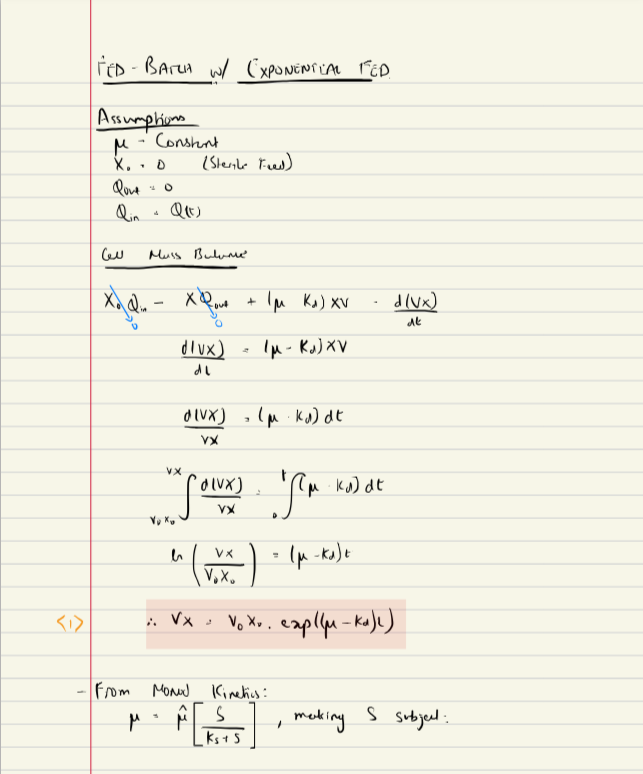

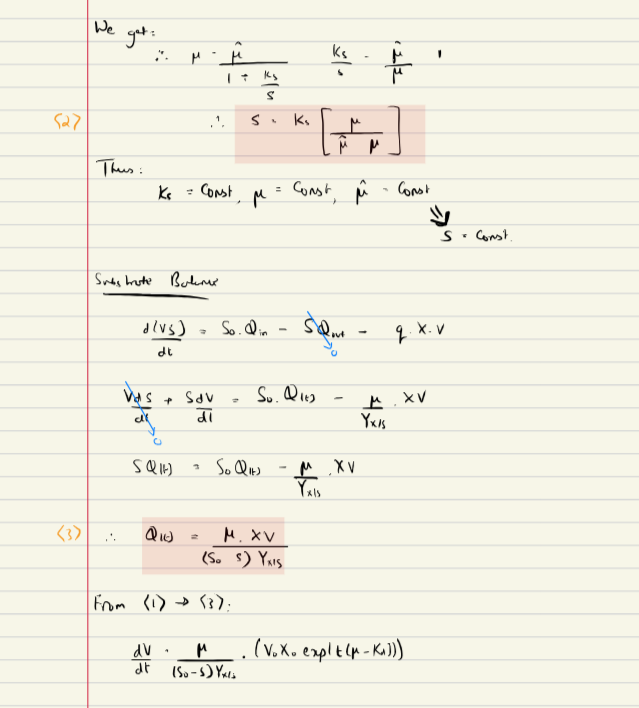

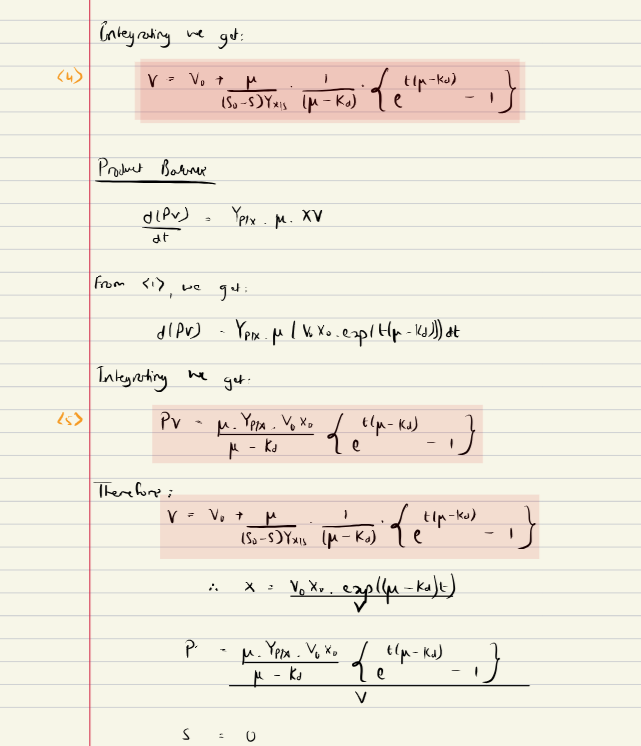

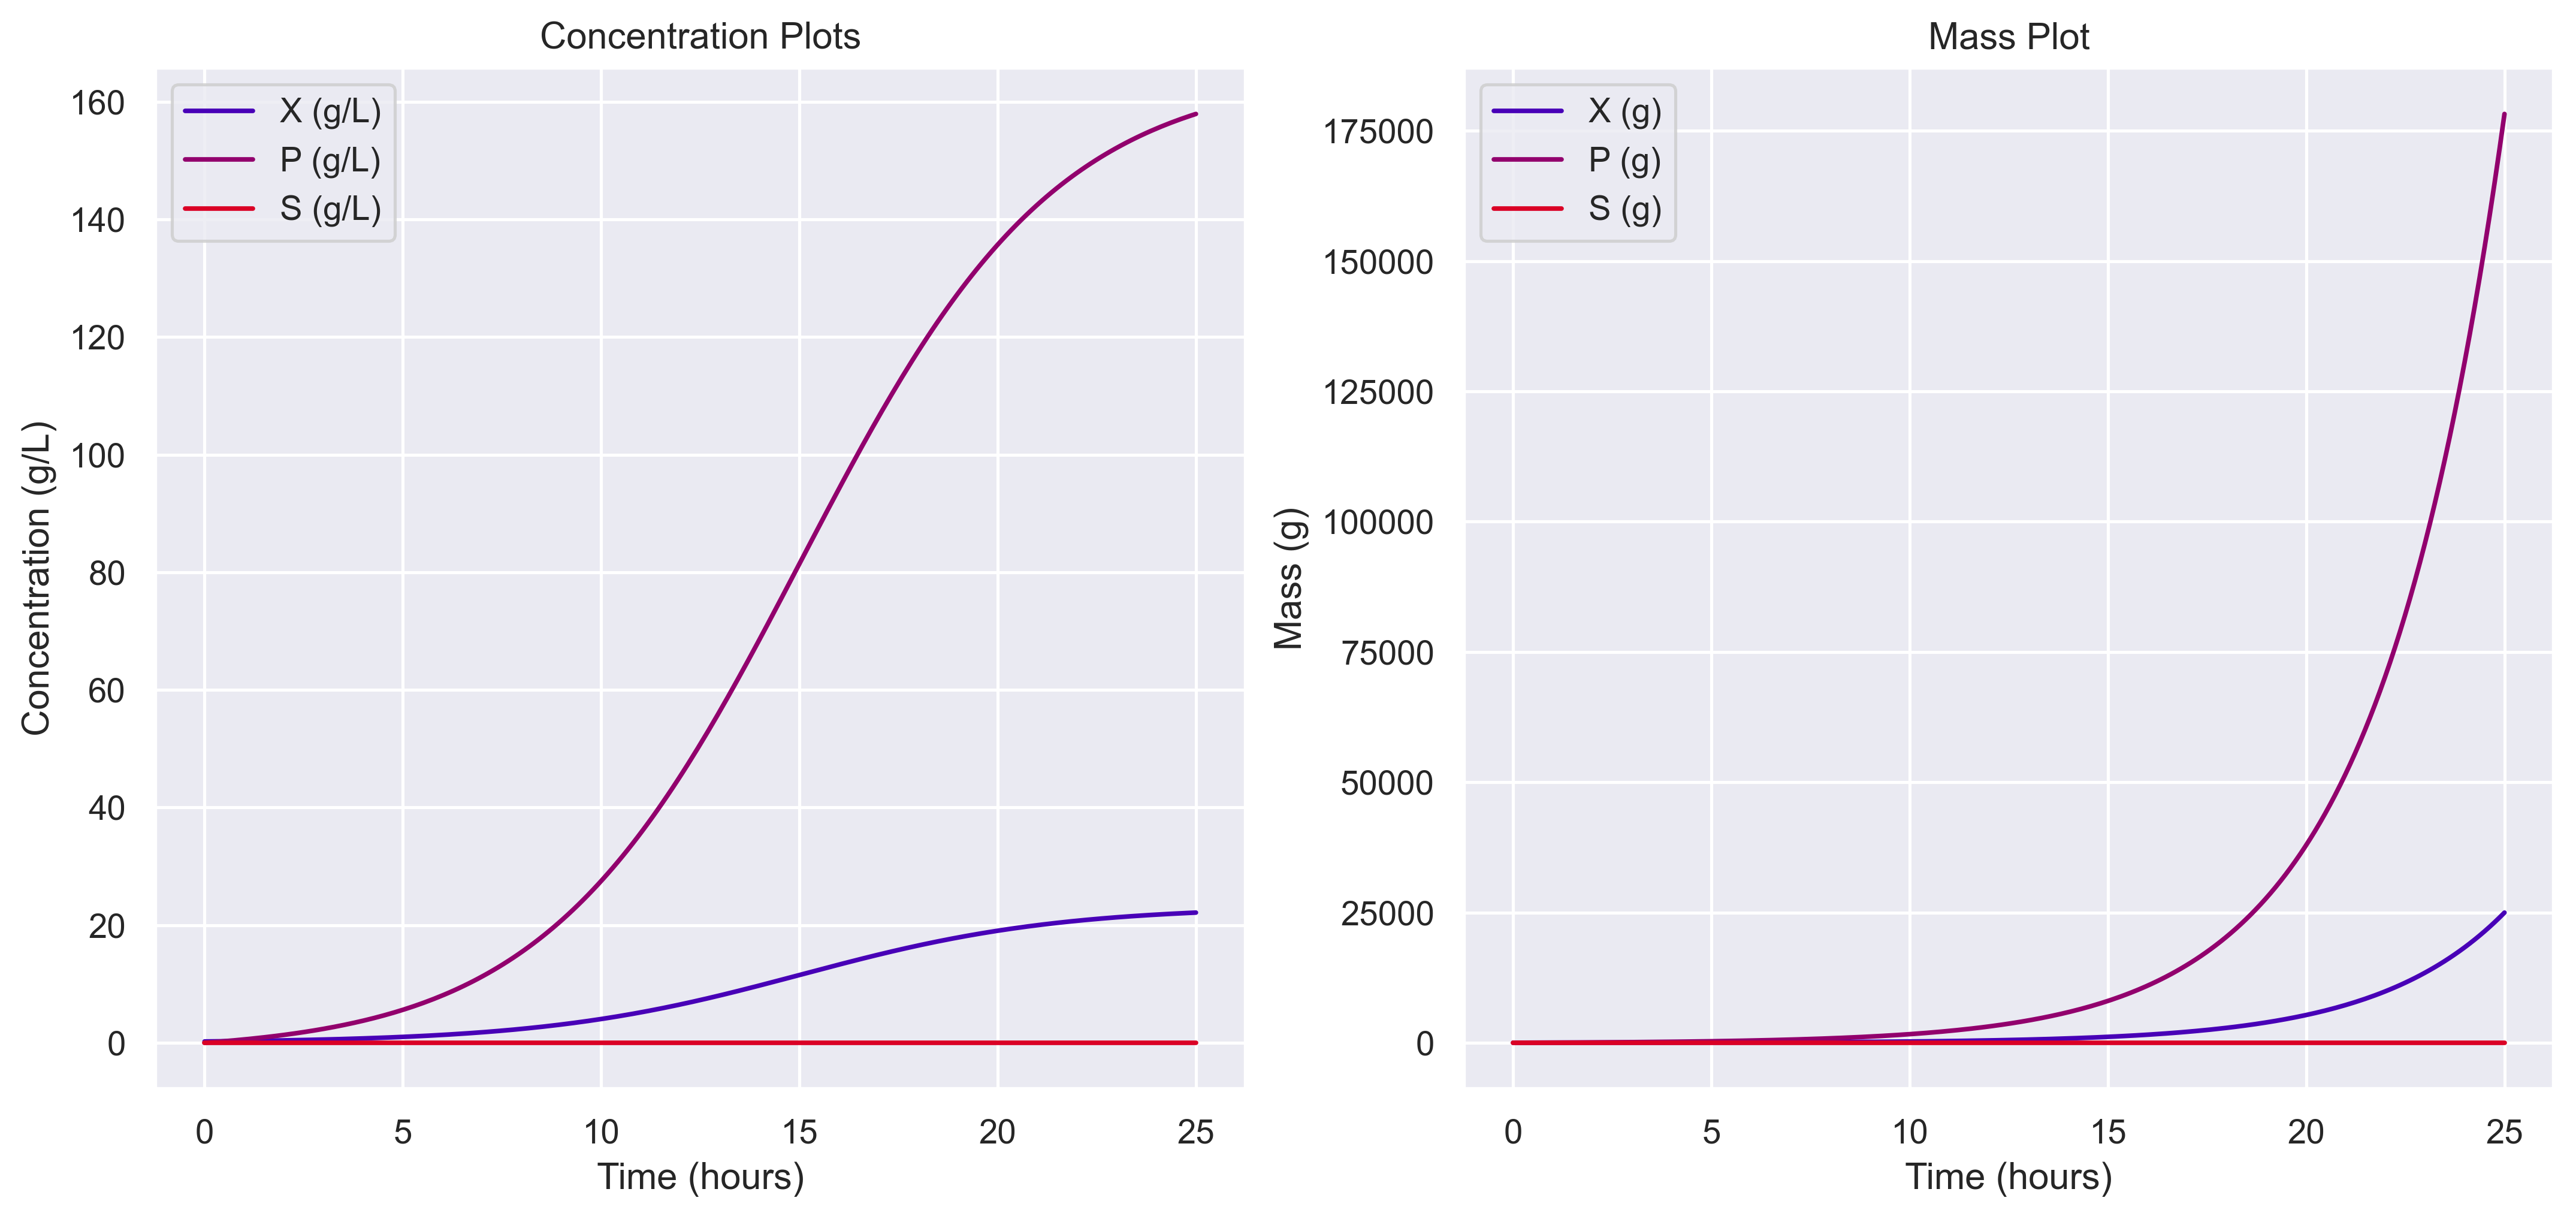

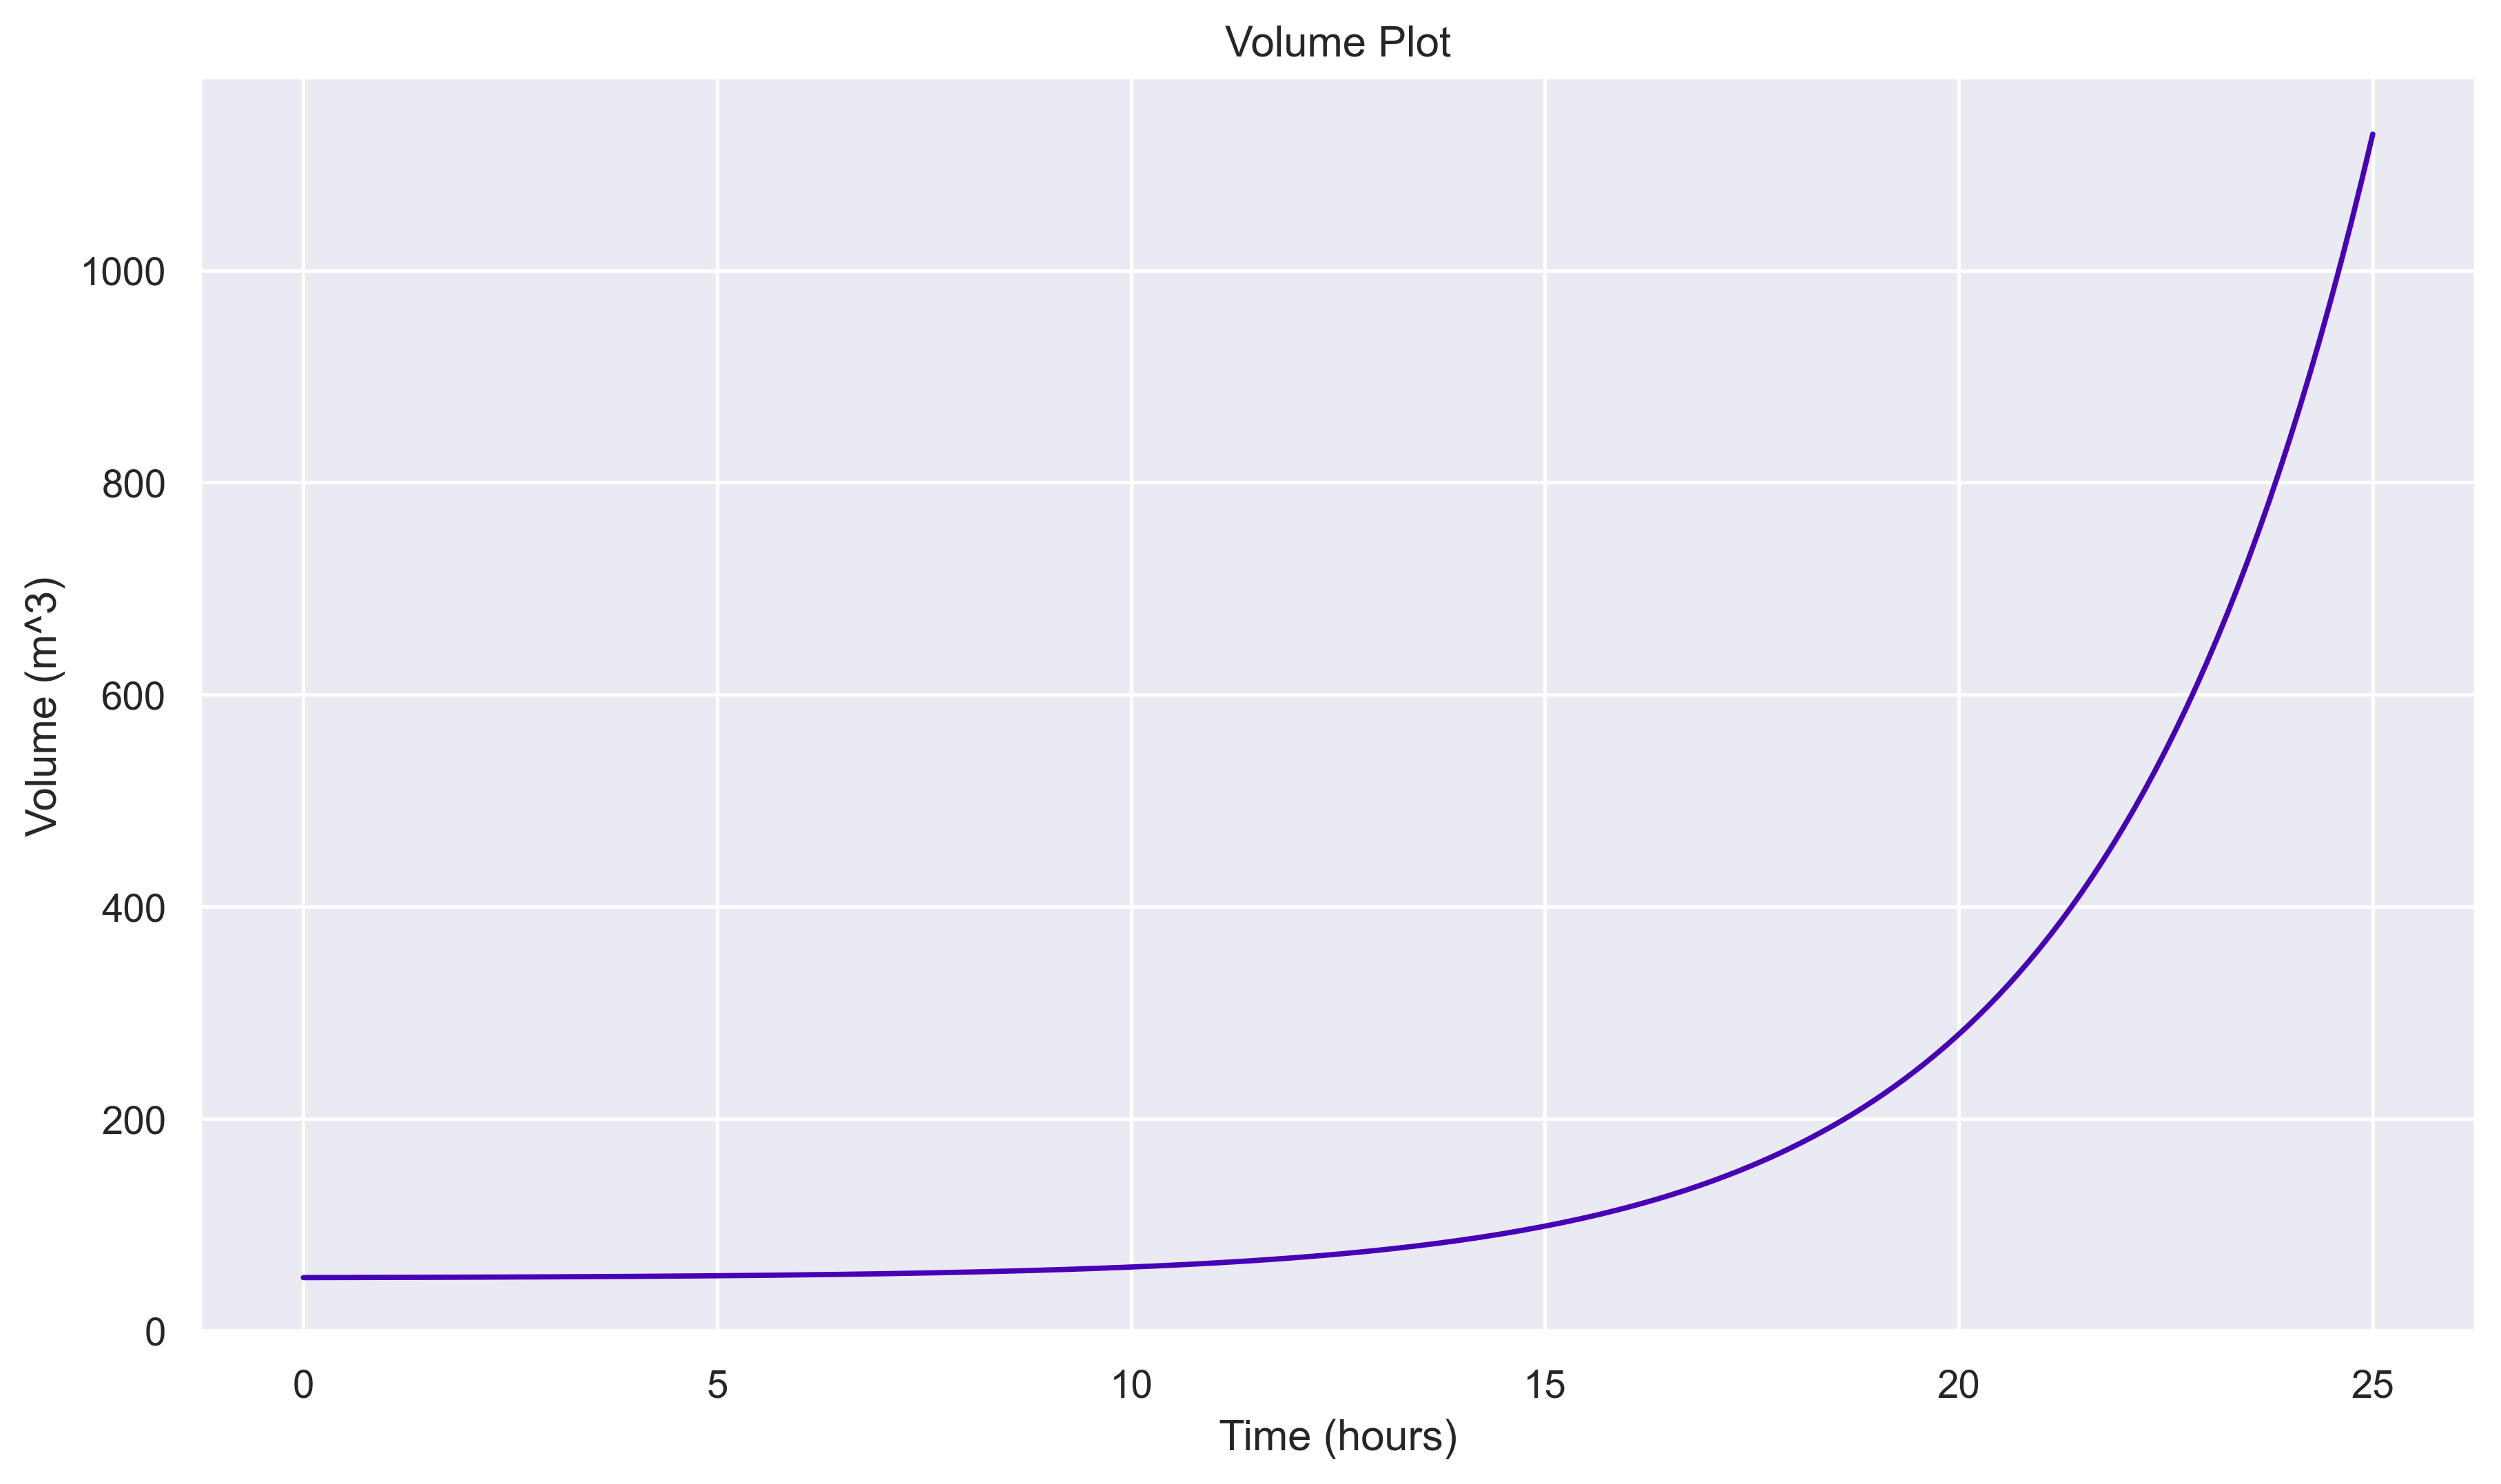

In [11]:
# Constants
mu = 0.33065950076718  # /hour

# Time points
t = np.linspace(0, 25, 200)  # 0 to 25 hours

# Equations
S = 0
V = V_0 + (X_0 * V_0 * mu) / (Y_X_S * (S_0 - S) * (mu - K_d)) * (np.exp(t * (mu - K_d)) - 1)
X = (X_0 * V_0 * np.exp(t * (mu - K_d))) / V
P = (Y_P_X * X_0 * V_0 * mu) / (V * (mu - K_d)) * (np.exp(t * (mu - K_d)) - 1)

# Plotting
plt.figure(figsize=(14, 6), dpi = 369)

# Individual plots
plt.subplot(1, 2, 1)
sns.lineplot(x=t, y=X, label='X (g/L)')
sns.lineplot(x=t, y=P, label='P (g/L)')
sns.lineplot(x=t, y=S, label='S (g/L)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.title('Concentration Plots')
plt.legend()

# Combined plot
plt.subplot(1, 2, 2)
sns.lineplot(x=t, y=(X*V), label='X (g)')
sns.lineplot(x=t, y=(P*V), label='P (g)')
sns.lineplot(x=t, y=(S*V), label='S (g)')
plt.xlabel('Time (hours)')
plt.ylabel('Mass (g)')
plt.title('Mass Plot')
plt.legend()

# Volume Plot
plt.figure(figsize = (10,6), dpi = 369)
sns.lineplot(x=t, y=V)
plt.xlabel('Time (hours)')
plt.ylabel('Volume (m^3)')
plt.title('Volume Plot')

plt.tight_layout()
plt.show()

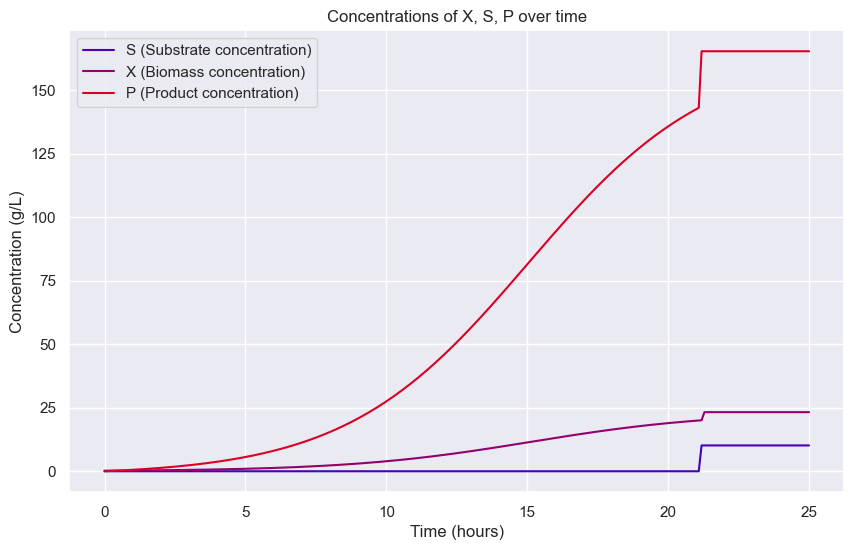

Complete Batch Time =  21.184738955823292 hrs


In [12]:
# Constants
D = mu  # Assuming D = mu for this context

# Time setup using np.linspace
t_values = np.linspace(0, 25, 250)  # 250 time steps from 0 to 25

S_values = []
X_values = [X_0]
P_values = []

for t in t_values:
    if X_values[-1] <= 20:
        S = 0
        V = V_0 + (X_0 * V_0 * mu) / (Y_X_S * (S_0 - S) * (mu - K_d)) * (np.exp(t * (mu - K_d)) - 1)
        X = (X_0 * V_0 * np.exp(t * (mu - K_d))) / V
        P = (Y_P_X * X_0 * V_0 * mu) / (V * (mu - K_d)) * (np.exp(t * (mu - K_d)) - 1)
    else:   
        t_switch = t_values[np.argmin(np.abs(np.array(X_values) - 20))]
        S = K_S * (D + K_d) / (mu_hat - (D + K_d))
        X = S_0 * Y_X_S * D / (D + K_d)
        P = Y_P_S * S_0
    
    S_values.append(S)
    X_values.append(X)
    P_values.append(P)
    
# Plotting code (same as before)
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='S (Substrate concentration)')
plt.plot(t_values, X_values[:-1], label='X (Biomass concentration)')
plt.plot(t_values, P_values, label='P (Product concentration)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.title('Concentrations of X, S, P over time')
plt.legend()
plt.grid(True)
plt.show()

print('Complete Batch Time = ', t_values[np.argmax(P_values)], 'hrs')

5. **(comparison)** Provide a table summarizing the potential advantages and disadvantages of the main fermentation modes: batch, fed-batch, CSTR. 

||Advantages|Disadvantages|
|:--:|:--:|:--:|
|Batch|Simple operation and design|Limited productivity due to finite substrate|
||Lower risk of contamination due to closed system|Product and substrate inhibition can occur|
||Suitable for high-value, low-volume products|Downtime between batches for cleaning and setup|
|Fed Batch|Higher control over substrate concentration|More complex operation and control|
||Can achieve higher cell densities|Potential for product inhibition if not managed properly|
||Reduced risk of substrate inhibition|Requires careful monitoring and feed strategy|
|CSTR|Continuous operation can lead to higher productivity|Higher risk of contamination due to open system|
||Steady state operation simplifies control|Requires continuous monitoring and control|
||Product inhibition can be minimized|May require more complex downstream processing|